# <span style='color:black'> BAN 4550 Final Project - Iowa Liquor Sales  </span>

### Authors: Group 2 ( Nehemie Joseph, Rubina Pradhan & Yashaswini Thokala)

##  <span style='color:black'> Table of Contents: </span>
>[Introduction](#1.-Introduction:) 
     
   1.1 [Business Case](#1.1-Business-Case:)
     
   1.2 [Intened Audience](#1.2-Intended-Audience:)
     
   1.3 [Project Purpose](#1.3-Project-Purpose:)
     
   1.4 [Importance of the Project](#1.4-Importance-of-the-Project:)

>[Datasets Description](#2.-Datasets-Description:)

   2.1 [Cleaning and Processing](#2.1-Cleaning-and-Processing:)
 
    
>[Analysis & Observation](#3.-Analysis-&-Observation)
    
   3.1 [Hypothesis and Supporting Evidence](#3.1-Hypothesis-and-Supporting-Evidence:)

   3.2 [Exploratory Data Analysis](#3.2-Exploratory-Data-Analysis:)
    
   3.3 [Diagnostic Data Analysis](#3.3-Diagnostic-Data-Analysis:)
     
     
>[Conclusion](#4.-Conclusion)

  4.1 [Summary of Findings](#4.1-Summary-of-Findings:)
    
  4.2 [Business Implications](#4.2-Business-Implications:)
   
  4.3 [Limitations of the Project](#4.3-Limitations-of-the-Project:)

  4.4 [Projective Advancement](#4.4.-Projective-Advancements:)
  
  
>[References](#5.-References)
     

#  1. Introduction:

### 1.1 Business Case:

Iowa is one of the 17 Alcohol Beverage Control states in the USA. Translation: the state is the single distribution for the wholesale of alcohol. Specifically in Iowa, all wholsale of spirits are sold to retailers by the Iowa Alcoholic Beverages Division, except wine and beer which can be sold by private license-holders. Therefore, both the retailers and alcohol companies must know their market in order to advocate to the state to distribute x alcohol. Our team was hired by an independent research company to provide in-depth analysis on Iowa's alochol market for retailers and alcohol companies' benefit. 

### 1.2 Intended Audience:

Retailers: Sales and Marketing Managers &
Alcohol Companies: Marketing and Public Relations Managers.

### 1.3 Project Purpose:

The main purpose of this project is to give an insight on Iowa's alcohol market to the Retaile: Sales and Marketing Manager & Alcohol Companies: Marketing and Public Relations Managers. To provide this in-depth analysis we will be examining the 2019 Iowa Liquor Sales provided by the Iowa Alcoholic Beverages Division [1] and 2019 Census-Iowa: Income, Race & Population Dataset [2-4]. Our goal is to explore the following questions:

1. How are sales or brands impacted when investigating the relationship between the 3 main attributes of the external datasets: Income, Race, and Population?

2. For 2019, what were the highlights: top 5 popular brands of alcohol as a seasonal decision maker for, total sales based on counties and, total comsumed alcohol based on counties?

3. What are the main predicting factors of sales that will benefit the both sides?


###  1.4 Importance of the Project:

According to the Iowa Alcoholic Beverages Division, liqour sales increased by  6%  compared to the previous fiscal year (2018) [5]. By anaylzing these sales to present a story of what occur, managers within retailers and alchol companies will be able to create actionable profitable goals for the following year.


# 2. Datasets Description:

This project consists of 4 datasets that accounts to over 3 million observations. 

Our primary data set is Iowa's 2019 Liquor Sales provided by Iowa Alcoholic Beverages Division. It consists of  sale transactions infrormation from the retailer and vendor side resulting in 24 variables. The alcohol transaction information label under Class “E” licensees [7] within Iowa includes: location details, vendor, supply type i.e., ml and pack, sales price and more.  

Our secondary data set is the 2019 Census-Iowa: Income (inflation-adjusted). This dataset consit of 7,481 variable columns ( I.e: Households Estimate, Households Margin of Error, and more.) and 16 rows ( Income ranges: Less than $10,000, 10,000to10,000to 14,999,etc.)

Our third data set is the 2019 Census-Iowa: Race. This dataset consit of  1,871 variables ( I.e: Estimate, Margin of Error, etc.) and 10 rows ( White alone, Black or African American alone, American Indian and Alaska Native alon,etc.)

Our fouth data set is the 2019 Census-Iowa: Population. This dataset consit of 11,221 variables ( I.e: Total Estimate, Total Margin of Error, and Percent Estimate.) and 42 rows ( 21 years and over, Median age (years), Sex ratio (males per 100 females, etc.)



Data Set Links: 

1. Iowa Liquor Sales in 2019. 
- Link: https://data.iowa.gov/Sales-Distribution/2019-Iowa-Liquor-Sales/38x4-vs5h

2. Census- American Community Survey- Iowa- INCOME IN THE PAST 12 MONTHS (IN 2019 INFLATION-ADJUSTED DOLLARS)

- Link: https://data.census.gov/cedsci/table?t=Income%20and%20Poverty&g=0400000US19%248600000&tid=ACSST5Y2019.S1901

3. Ethnicity of Population Living in Iowa in 2019

- Link: https://data.census.gov/cedsci/table?t=American%20Indian%20and%20Alaska%20Native&g=0400000US19%248600000&tid=ACSDT5Y2019.B02001&hidePreview=true

4. Sex of Population Living in Iowa in 2019

- Link: https://data.census.gov/cedsci/table?t=Age%20and%20Sex&g=0400000US19%248600000&tid=ACSST5Y2019.S0101&hidePreview=false

In [1]:
# Importing all necessary libaries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
import patsy
import matplotlib.ticker as ticker
import geopandas
import plotnine
from plotnine import *
import shapefile as shp


#  Importing  all datasets:

# Iowa Sales Dataset
IowaLS = '/Users/clarkuniveristy/Downloads/2019_Iowa_Liquor_Sales.csv'
IowaLSdf = pd.read_csv(IowaLS)
# Income Dataset
IowaIncome  =  '/Users/clarkuniveristy/Downloads/INCOME+IN+THE+PAST+12+MONTHS+(IN+2019+INFLATION-ADJUSTED+DOLLARS).csv'
IowaIncomedf = pd.read_csv(IowaIncome)
# Race Dataset
IowaRace = '/Users/clarkuniveristy/Downloads/RACE (1).csv'
IowaRacedf = pd.read_csv(IowaRace)
# Sex Dataset
IowaSex = '/Users/clarkuniveristy/Downloads/Correct+Age+and+Sex.csv'
IowaSexdf = pd.read_csv(IowaSex)

###  2.1 Cleaning and Processing:


Due to the size of the datasets, the data cleaning and processing steps became crucial.
The following steps were taken:

1. Due to the size of the datasets, we subset the Iowa Dataset to only show transaction details from the top 5 suppliers. Reason: 67.5% of the sales are generated from the top 5 suppliers at approximately 185.4 million  out of 274.5 million. 

2. Iowa Data Set: Drop several columns with repeated information or which did not align with our project ( ie. Vendor Number, Store Number , etc). Reformatted the type of data to allow for future merging. Remove NA Values. 

3. Race Data Set:  Reformatted  the data type and names to allow for future merging. Remove several columns that did not align with our project( i.e  Margin of Error per zipcode).Subset the data to only contain individual classfication of x race alone( i.e Black or African American alone) and two or more races for those who are labelled as mix. The goal of this dataset is to get the most appromiximate amount of population per race by zip code. 

4. Income Data Set:  Reformatted  the data type and names to allow for future merging.  Remove several columns that did not align with our project ( i.e Families Estimate, Families Margin of Error, and more). The goal of this dataset is to get the overall income ranges within a county by generic household.

5. Sex Data Set: Reformatted  the data type and names to allow for future merging.  Remove several columns that did not align with our project( i.e Percent Estimate and Total Margin of Error). Subset the data to only contain 21 years old and over population. The goal of this project is to get the approximate population amount per zip code. 

6. Merge all four Data Sets.

7. Renamed the columns for clarity, dropped some repeated columns( i.e zip codes).  
---
* Data Cleaning: "the process of preparing data for analysis by removing or modifying data that is incorrect, incomplete, irrelevant, duplicated, or improperly formatted." [8] 

* Data processing:"data is collected and translated into usable information."[9]



In [2]:
#Coding required to do steps above:

#Data Cleaning of Iowa Liqor Sales: #1: Reducing the size of the data to only show the top 5 vendors.

#drop the unwanted columns
IowaLSdf1 = IowaLSdf.drop(['Invoice/Item Number','Address', 'Store Number', 'City', 'Store Location', 'County Number', 'Category', 'Vendor Number', 'Item Number', 'Volume Sold (Gallons)'], axis=1)
#Change Bottle Volume measurement from ml to liter and renaming the column to Bottle Volume (liters)
IowaLSdf1['Bottle Volume (ml)'] = IowaLSdf1['Bottle Volume (ml)']/1000
IowaLSdf1 = IowaLSdf1.rename(columns = {"Bottle Volume (ml)":"Bottle Volume (liters)"})
#Changing Date column into datetime format
IowaLSdf1['Date'] = pd.to_datetime(IowaLSdf1['Date'])
#Removing NA values from dataset
IowaLSdf1 = IowaLSdf1.dropna()
#Changing ZipCode type from object to integer
IowaLSdf1['Zip Code'] = IowaLSdf1['Zip Code'].astype(int)
#Picking out data only for the top 5 vendors from the dataset
dftest1 = IowaLSdf1[IowaLSdf1['Vendor Name'] == 'DIAGEO AMERICAS']
dftest2 = IowaLSdf1[IowaLSdf1['Vendor Name'] == 'Jim Beam Brands']
dftest3 = IowaLSdf1[IowaLSdf1['Vendor Name'] == 'SAZERAC COMPANY  INC']
dftest4 = IowaLSdf1[IowaLSdf1['Vendor Name'] == 'LUXCO INC']
dftest5 = IowaLSdf1[IowaLSdf1['Vendor Name'] == 'PERNOD RICARD USA']
frames = [dftest1, dftest2, dftest3, dftest4, dftest5]
IowaLSdf1 = pd.concat(frames)
IowaLSdf1 = IowaLSdf1.reset_index(drop=True)


In [3]:
#Data Cleaning of Income Dataset:
#Remove ZCTA5 and !! from field names
IowaIncomedf.columns= IowaIncomedf.columns.str.replace("ZCTA5", " ")
IowaIncomedf.columns= IowaIncomedf.columns.str.replace("!!", " ")
IowaIncomedf.columns= IowaIncomedf.columns.str.replace("Households Estimate", " ")

#Keeping column: Households Estimate only. Dropping columns base on string text
IowaIncomedf = IowaIncomedf[IowaIncomedf.columns.drop(list(IowaIncomedf.filter(regex='Margin of Error')))]
IowaIncomedf = IowaIncomedf[IowaIncomedf.columns.drop(list(IowaIncomedf.filter(regex='Families' )))]
IowaIncomedf = IowaIncomedf[IowaIncomedf.columns.drop(list(IowaIncomedf.filter(regex='families' )))]
IowaIncomedf = IowaIncomedf[IowaIncomedf.columns.drop(list(IowaIncomedf.filter(regex='Nonfamily' )))]

#Drop Rows  
IowaIncomedf = IowaIncomedf.drop([11,12,13,14,15,16])
#Reset Indexing to start from 0
IowaIncomedf = IowaIncomedf.reset_index(drop=True)

In [4]:
#Data Cleaning of Race Dataset:
#Removing ZCTA5 and !! from field names
IowaRacedf.columns = IowaRacedf.columns.str.replace("ZCTA5", " ")
IowaRacedf.columns = IowaRacedf.columns.str.replace("!!", " ")
IowaRacedf.columns = IowaRacedf.columns.str.replace("Estimate", " ")

#Keeping column: Estimate only. Dropping columns base on string text.
IowaRacedf = IowaRacedf[IowaRacedf.columns.drop(list(IowaRacedf.filter(regex='Margin of Error')))]

#Drop rows
IowaRacedf = IowaRacedf.drop([0,8,9])
#Reset Indexing to start from 0
IowaRacedf = IowaRacedf.reset_index(drop=True)


In [5]:
#Data Cleaning of Sex Dataset:
#Removing ZCTA5 and !! from field names
IowaSexdf.columns = IowaSexdf.columns.str.replace('ZCTA5',' ')
IowaSexdf.columns = IowaSexdf.columns.str.replace('!!', ' ')

#Keeping column: Male Estimate & Female Estimate only. Dropping columns base on string text
IowaSexdf = IowaSexdf[IowaSexdf.columns.drop(list(IowaSexdf.filter(regex='Margin of Error')))]
IowaSexdf = IowaSexdf[IowaSexdf.columns.drop(list(IowaSexdf.filter(regex='Percent')))]

#Drop Rows
IowaSexdf = IowaSexdf.drop([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,29,30,31,32,33,34,35,36,37,38,39,40,41])


In [6]:
#Isolating Male Population:

#Removing Female Estimate and Total Estimate
MalePop = IowaSexdf[IowaSexdf.columns.drop(list(IowaSexdf.filter(regex='Female Estimate')))]
MalePopdf = MalePop[MalePop.columns.drop(list(MalePop.filter(regex='Total Estimate')))]
MalePopdf.columns= MalePopdf.columns.str.replace("Male Estimate", " ")

#Changing MalePop from wide to long
MalePopdf = pd.melt(MalePopdf,id_vars="Label (Grouping)")
#Renaming Columns
MalePopdf.columns = ['Age', 'ZipCode','MPopulation']
#Changing ZipCode type to integer
MalePopdf['ZipCode'] = MalePopdf['ZipCode'].astype(int)

In [7]:
#Isolating Female Population:

#Removing Male Estimate and Total Estimate
FemalePop = IowaSexdf[IowaSexdf.columns.drop(list(IowaSexdf.filter(regex='Male Estimate')))]
FemalePopdf = FemalePop[FemalePop.columns.drop(list(FemalePop.filter(regex='Total Estimate')))]
FemalePopdf.columns= FemalePopdf.columns.str.replace("Female Estimate", " ")

#Changing FemalePop from wide to long
FemalePopdf = pd.melt(FemalePopdf,id_vars="Label (Grouping)")
#Renaming Columns
FemalePopdf.columns = ['Age', 'ZipCode','FPopulation']
#Changing ZipCode type to integer
FemalePopdf['ZipCode'] = FemalePopdf['ZipCode'].astype(int)


In [8]:
#Isolating Total Population:

#Removing Male Estimate and Female Estimate
TotalPop = IowaSexdf[IowaSexdf.columns.drop(list(IowaSexdf.filter(regex='Male Estimate')))]
TotalPopdf = TotalPop[TotalPop.columns.drop(list(TotalPop.filter(regex='Female Estimate')))]
TotalPopdf.columns= TotalPopdf.columns.str.replace("Total Estimate", " ")

#Changing TotalPop from wide to long
TotalPopdf = pd.melt(TotalPopdf,id_vars="Label (Grouping)")
#Renaming Columns
TotalPopdf.columns = ['Age', 'ZipCodeT','TPopulation']

#Changing ZipCode type to integer
TotalPopdf['ZipCodeT'] = TotalPopdf['ZipCodeT'].astype(int)

In [9]:
#Merging Iowa Sales dataset with Male Population dataset
IowaLSdf1 =IowaLSdf1.merge(MalePopdf, left_on ="Zip Code",right_on= "ZipCode")
IowaLSdf1 = IowaLSdf1.drop(['Age', 'ZipCode'], axis=1)

#Merging Iowa Sales dataset with Female Population dataset
IowaLSdf1 = IowaLSdf1.merge(FemalePopdf, left_on ="Zip Code",right_on= "ZipCode")
IowaLSdf1 = IowaLSdf1.drop(['Age', 'ZipCode'], axis=1)

#Merging Iowa Sales dataset with Total Population dataset
IowaLSdf1 = IowaLSdf1.merge(TotalPopdf, left_on ="Zip Code",right_on= "ZipCodeT")
IowaLSdf1 = IowaLSdf1.drop(['Age', 'ZipCodeT'], axis=1)


In [10]:
#Merging Iowa Sales dataset with Income dataset

#Changing Income from wide to long
IowaIncomedf = pd.melt(IowaIncomedf,id_vars="Label (Grouping)")

#Renaming Columns and changing ZipCode type to int
IowaIncomedf.columns = ['Income Range', 'ZipCode','Household Estimate']
IowaIncomedf['ZipCode'] = IowaIncomedf['ZipCode'].astype(int)

#Interchanging ZipCode and IncomeRange as row values and column values
IowaIncomedf = IowaIncomedf.pivot(index='ZipCode', columns='Income Range', values='Household Estimate')

#Merging 
IowaLSdf1 = IowaLSdf1.merge(IowaIncomedf, left_on ="Zip Code",right_on= "ZipCode")

In [11]:
#Merging Iowa Sales dataset with Race dataset

#Changing Race from wide to long
IowaRacedf = pd.melt(IowaRacedf,id_vars="Label (Grouping)")

#Renaming Columns and changing ZipCode type to int
IowaRacedf.columns = ['Race', 'ZipCode','Population Count']
IowaRacedf['ZipCode'] = IowaRacedf['ZipCode'].astype(int)

#Interchanging ZipCode and IncomeRange as row values and column values
IowaRacedf = IowaRacedf.pivot(index='ZipCode', columns='Race', values='Population Count')

#Merging 
IowaLSdf1 = IowaLSdf1.merge(IowaRacedf, left_on ="Zip Code",right_on= "ZipCode")

In [12]:
# Reformating the main dataset to be compatible for coding:

#change Tpopulation from object to int 

IowaLSdf1['TPopulation'] = IowaLSdf1['TPopulation'].str.replace(',', '').astype(float)

IowaLSdf1['TPopulation'] = IowaLSdf1['TPopulation'].astype(int)

In [13]:
#change the race columns to float. Float was used due to coding issues. It did not alter the data in anyway.
IowaLSdf1.columns = IowaLSdf1.columns.str.lstrip()

IowaLSdf1['Asian alone'] = IowaLSdf1['Asian alone'].str.replace(',', '').astype(float)

IowaLSdf1['American Indian and Alaska Native alone'] = IowaLSdf1['American Indian and Alaska Native alone'].str.replace(',', '').astype(float)

IowaLSdf1['Black or African American alone'] = IowaLSdf1['Black or African American alone'].str.replace(',', '').astype(float)

IowaLSdf1['Native Hawaiian and Other Pacific Islander alone'] = IowaLSdf1['Native Hawaiian and Other Pacific Islander alone'].str.replace(',', '').astype(float)

IowaLSdf1['White alone'] = IowaLSdf1['White alone'].str.replace(',', '').astype(float)

IowaLSdf1['Some other race alone'] = IowaLSdf1['Some other race alone'].str.replace(',', '').astype(float)

IowaLSdf1['Two or more races:'] = IowaLSdf1['Two or more races:'].str.replace(',', '').astype(float)

In [14]:
#removed invisible spaces from the begining column names

IowaLSdf1.columns = IowaLSdf1.columns.str.lstrip()

In [15]:
#changing the Income Ranges columns to float. Float was used due to coding issues. It did not alter the data in anyway.
IowaLSdf1['$15,000 to $24,999'] = IowaLSdf1['$15,000 to $24,999'].str.replace('%', '').astype(float)
IowaLSdf1['$15,000 to $24,999'] = IowaLSdf1['$15,000 to $24,999']/100

IowaLSdf1['$150,000 to $199,999'] = IowaLSdf1['$150,000 to $199,999'].str.replace('%', '').astype(float)
IowaLSdf1['$150,000 to $199,999'] = IowaLSdf1['$150,000 to $199,999']/100

IowaLSdf1['$200,000 or more'] = IowaLSdf1['$200,000 or more'].str.replace('%', '').astype(float)
IowaLSdf1['$200,000 or more'] = IowaLSdf1['$200,000 or more']/100

IowaLSdf1['$35,000 to $49,999'] = IowaLSdf1['$35,000 to $49,999'].str.replace('%', '').astype(float)
IowaLSdf1['$35,000 to $49,999'] = IowaLSdf1['$35,000 to $49,999']/100

IowaLSdf1['$50,000 to $74,999'] = IowaLSdf1['$50,000 to $74,999'].str.replace('%', '').astype(float)
IowaLSdf1['$50,000 to $74,999'] = IowaLSdf1['$50,000 to $74,999']/100

IowaLSdf1['$75,000 to $99,999'] = IowaLSdf1['$75,000 to $99,999'].str.replace('%', '').astype(float)
IowaLSdf1['$75,000 to $99,999'] = IowaLSdf1['$75,000 to $99,999']/100

IowaLSdf1['Less than $10,000'] = IowaLSdf1['Less than $10,000'].str.replace('%', '').astype(float)
IowaLSdf1['Less than $10,000'] = IowaLSdf1['Less than $10,000']/100

IowaLSdf1['$25,000 to $34,999'] = IowaLSdf1['$25,000 to $34,999'].str.replace('%', '').astype(float)
IowaLSdf1['$25,000 to $34,999'] = IowaLSdf1['$25,000 to $34,999']/100

IowaLSdf1['$100,000 to $149,999'] = IowaLSdf1['$100,000 to $149,999'].str.replace('%', '').astype(float)
IowaLSdf1['$100,000 to $149,999'] = IowaLSdf1['$100,000 to $149,999']/100

IowaLSdf1['$10,000 to $14,999'] = IowaLSdf1['$10,000 to $14,999'].str.replace('%', '').astype(float)
IowaLSdf1['$10,000 to $14,999'] = IowaLSdf1['$10,000 to $14,999']/100

In [16]:
#Changing the TPopulation into a float.Float was used due to coding issues. It did not alter the data in anyway.
IowaLSdf1['Total'] = IowaLSdf1['Total'].str.replace(',', '').astype(float)



# Index

|Index No.||Column||Data Type|
|----||---||----|
| 0 || Date||datetime64|
|1 ||Store Name||object |
|2 ||Zip Code || int32 |
|3 ||County || object |
|4 ||Category Name || object |
|5 ||Vendor Name || object |
|6 ||Item Description || object |
|7 ||Pack || int64 |
|8 ||Bottle Volume (liters) || float64 |
|9 ||State Bottle Cost || float64 |
|10||State Bottle Retail || float64 |
|11|| Bottles Sold || int64 |
|12|| Sale (Dollars) || float64 |
|13|| Volume Sold (Liters) || float64 |
|14||MPopulation || object |
|15||FPopulation || object |
|16|| TPopulation || int32|
|17|| Total || object |
|18|| $ 10,000 to $ 14,999 || float64 |
| 19 || $ 100,000 to $ 14,999 || float64 |
| 20 ||$ 15,000 to $ 44,999 || float64 |
| 21 || $ 150,000 to $ 199,999 || float64|
|22||$ 200,000 ||float64|
|23||$ 25,000 to $ 34,999||float64|
|22|| $ 200,000 or more || float64|
|23 || $ 25,000 to $34,999 || float64 |
|24|| $ 35,000 to $49,999 || float64 |
|25|| $ 50,000 to $74,999 || float64 |
|26||$ 75,000 to $99,999 || float64 |
|27 || Less than $ 10,000 || float64 |
|28|| American Indian and Alaska Native alone || float64 |
|29 || Asian alone || float64 |
|30 || Black or African American alone || float64 |
|31 || Native Hawaiian and Other Pacific Islander alone|| float64 |
|32 || Some other race alone || float64 |
|33 || Two or more races: || float64 |
|34 || White alone || float64 |

##  3. Analysis & Observation

To provide a relevant and statistically accurate market research we have done a descriptive and diagostic analysis report.

Descriptive Analysis: "is the type of analysis of data that helps describe, show or summarize data points in a constructive way such that patterns might emerge that fulfill every condition of the data." [10] 

This analysis is communicated through (but not limited to): 

- Bar Graphs
- Box Plot
- Frequency Table
- Correlation Matrix


Diagnostic Analysis: "Diagnostic analysis takes the insights found from descriptive analytics and drills down to find the causes of those outcomes. Organizations make use of this type of analytics as it creates more connections between data and identifies patterns of behavior"[11] This is one step above descriptive step.

This analysis is communicated through (but not limited to): 

- OLS
- The above analysis methods was used for diagnostic.


###  3.1 Hypothesis and Supporting Evidence:

When researching about Iowa's liquor sales and our the censue datas we came up with the following  hypothesis:

H1: The brand with the highest sales is overall the highest purachsed item throught out the season.

H2: The top counties with the highest volume of alcohol consumed are equal to the top counties with the highest number of legal drinking populations.

H3: The top 5 sales of alcohol will differ in areas that are more diverse per race compared to the highest Caucasian populate area. 
   
H4: Income has a significant impact on the sales of alcohol.


### 3.2 Exploratory Data Analysis:

### 3.2.1 Correlation map of Sales Data: rev, pack, bottle volume, state cost, state retail, bottle sold, volume sold liters

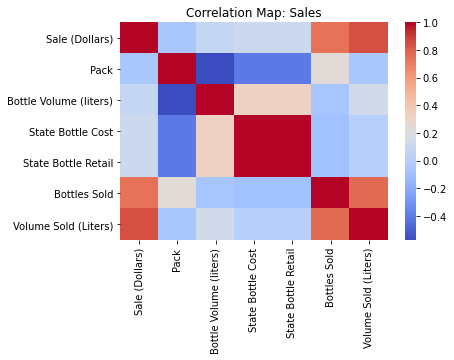

In [17]:
maptitle = plt.axes()
sns.heatmap(IowaLSdf1[[ 'Sale (Dollars)', "Pack", 'Bottle Volume (liters)',"State Bottle Cost","State Bottle Retail","Bottles Sold","Volume Sold (Liters)"  ]].corr(),cmap='coolwarm', ax=maptitle)
maptitle.set_title('Correlation Map: Sales')
plt.show()


In [18]:
# The correlation table to the correction map.
IowaLSdf1[[ 'Sale (Dollars)', "Pack", 'Bottle Volume (liters)',"State Bottle Cost","State Bottle Retail","Bottles Sold","Volume Sold (Liters)"  ]].corr()



,Sale (Dollars),Pack,Bottle Volume (liters),State Bottle Cost,State Bottle Retail,Bottles Sold,Volume Sold (Liters)
Sale (Dollars),1.000000,-0.047131,0.079383,0.114476,0.114479,0.747752,0.847839
Pack,-0.047131,1.000000,-0.573041,-0.401843,-0.401857,0.240224,-0.056405
Bottle Volume (liters),0.079383,-0.573041,1.000000,0.324177,0.324157,-0.058784,0.140015
State Bottle Cost,0.114476,-0.401843,0.324177,1.000000,0.999963,-0.086364,0.014181
State Bottle Retail,0.114479,-0.401857,0.324157,0.999963,1.000000,-0.086364,0.014184
Bottles Sold,0.747752,0.240224,-0.058784,-0.086364,-0.086364,1.000000,0.778391
Volume Sold (Liters),0.847839,-0.056405,0.140015,0.014181,0.014184,0.778391,1.000000


Explantion: 

The correlation map above depicts a detailed revenue. 

A highlighting factor is that cost of the alcohol does not play a  signnificant factor in sales. 

Additionally, the volume sold is the most favoriable variable to use as a predictor for sales due to it's high correclation.



###  What is the relationship between the sales of liquor and volume sold?

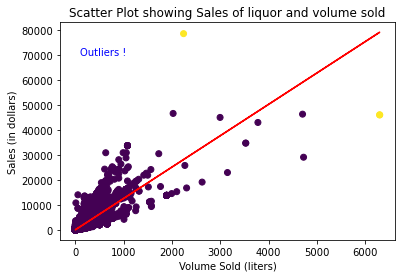

In [19]:
IowaLSdf1['outlier'] = (IowaLSdf1['Volume Sold (Liters)']>5000)|(IowaLSdf1['Sale (Dollars)']>=60000)
plt.scatter(IowaLSdf1['Volume Sold (Liters)'], IowaLSdf1['Sale (Dollars)'], c=IowaLSdf1['outlier'])
m, b=np.polyfit(IowaLSdf1['Volume Sold (Liters)'], IowaLSdf1['Sale (Dollars)'], 1)
plt.plot(IowaLSdf1['Volume Sold (Liters)'], m*IowaLSdf1['Volume Sold (Liters)']+b, color = 'red')
plt.text(100, 70000, 'Outliers !', fontsize=10, color='blue')
plt.title('Scatter Plot showing Sales of liquor and volume sold')
plt.xlabel('Volume Sold (liters)')
plt.ylabel('Sales (in dollars)')
plt.show()

Explanation:

Taking a futher investigative step into the relationship of sales and volume sold, the scatter plot above provides the visual component of that relationship.

We can interpret that most retailers are likely to buy the liquor between 0 to 1000 liters with the average sales ranging between 0 - 20,000 dollars. 

There are some outliners from extreme profits to low profits despite the volume sold.

Overall, the error in predicting profit is concentrated and is on the lower side, making the alcohol industry a safe business venture in Iowa.

In [20]:
IowaLSdf1.corr()

,Zip Code,Pack,Bottle Volume (liters),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),TPopulation,Total,...,"$75,000 to $99,999","Less than $10,000",American Indian and Alaska Native alone,Asian alone,Black or African American alone,Native Hawaiian and Other Pacific Islander alone,Some other race alone,Two or more races:,White alone,outlier
Zip Code,1.000000,0.024860,-0.011855,-0.022256,-0.022254,-0.005516,-0.012631,-0.006080,0.069905,0.066026,...,-0.065358,0.067894,-0.029216,-0.163467,0.121801,0.065296,0.023655,0.093940,0.060860,-0.000409
Pack,0.024860,1.000000,-0.573041,-0.401843,-0.401857,0.240224,-0.047131,-0.056405,0.052593,0.050992,...,-0.011094,0.026993,0.052495,-0.001896,0.074915,0.034113,0.049919,0.063742,0.048315,-0.000934
Bottle Volume (liters),-0.011855,-0.573041,1.000000,0.324177,0.324157,-0.058784,0.079383,0.140015,-0.068018,-0.066905,...,0.017348,-0.027672,-0.043625,-0.032932,-0.083121,-0.026608,-0.044188,-0.077057,-0.061907,0.001638
State Bottle Cost,-0.022256,-0.401843,0.324177,1.000000,0.999963,-0.086364,0.114476,0.014181,-0.008985,-0.009161,...,-0.019794,0.005571,-0.011705,0.028875,-0.016318,-0.015835,0.005692,-0.007281,-0.009150,0.000162
State Bottle Retail,-0.022254,-0.401857,0.324157,0.999963,1.000000,-0.086364,0.114479,0.014184,-0.008972,-0.009147,...,-0.019795,0.005562,-0.011699,0.028887,-0.016320,-0.015828,0.005686,-0.007272,-0.009137,0.000162
Bottles Sold,-0.005516,0.240224,-0.058784,-0.086364,-0.086364,1.000000,0.747752,0.778391,0.044637,0.043317,...,-0.031231,0.024111,0.029154,0.033631,0.062268,0.002213,0.045009,0.068646,0.038810,0.171557
Sale (Dollars),-0.012631,-0.047131,0.079383,0.114476,0.114479,0.747752,1.000000,0.847839,0.030177,0.029081,...,-0.030774,0.020589,0.013894,0.045716,0.042195,-0.000067,0.038890,0.048508,0.024549,0.189831
Volume Sold (Liters),-0.006080,-0.056405,0.140015,0.014181,0.014184,0.778391,0.847839,1.000000,0.022481,0.021904,...,-0.023243,0.015572,0.009242,0.032351,0.029923,-0.001381,0.027644,0.037970,0.018443,0.244633
TPopulation,0.069905,0.052593,-0.068018,-0.008985,-0.008972,0.044637,0.030177,0.022481,1.000000,0.997719,...,-0.179155,0.163344,0.349658,0.557660,0.604487,0.343225,0.464165,0.880928,0.987808,0.001216
Total,0.066026,0.050992,-0.066905,-0.009161,-0.009147,0.043317,0.029081,0.021904,0.997719,1.000000,...,-0.185631,0.170807,0.345781,0.566437,0.603594,0.337612,0.450319,0.880360,0.983483,0.001247


Overall correlation graph to understand the relationship between all variables. We can refer to this graph to state the impact of an statement (numerically). 

### 3.2.2 What are the top 5 brands based on sales?

In [21]:
#Creating a data frame to get the sales revenue amount of the top 5 brands

pd.DataFrame(round (IowaLSdf1.groupby(['Category Name'])['Sale (Dollars)'].sum().nlargest(5)))

,Sale (Dollars)
Category Name,
Canadian Whiskies,23688801.0
Whiskey Liqueur,19175167.0
Spiced Rum,16809308.0
Straight Bourbon Whiskies,15618750.0
American Vodkas,13970172.0


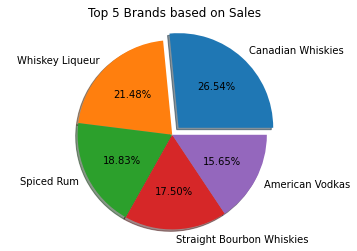

In [22]:
# pie chart of the Top 5 Brands with associated sales
Category_Sales=IowaLSdf1.groupby(['Category Name'])['Sale (Dollars)'].sum().nlargest(5)
labels= Category_Sales.index
sizes= Category_Sales
explode=(0.1, 0, 0, 0, 0)
plt.pie(sizes, labels=labels, explode=explode, autopct='%1.2f%%',shadow= True)
plt.axis('equal')
plt.title("Top 5 Brands based on Sales")
plt.show()

/opt/anaconda3/lib/python3.8/site-packages/descartes/patch.py:63: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.


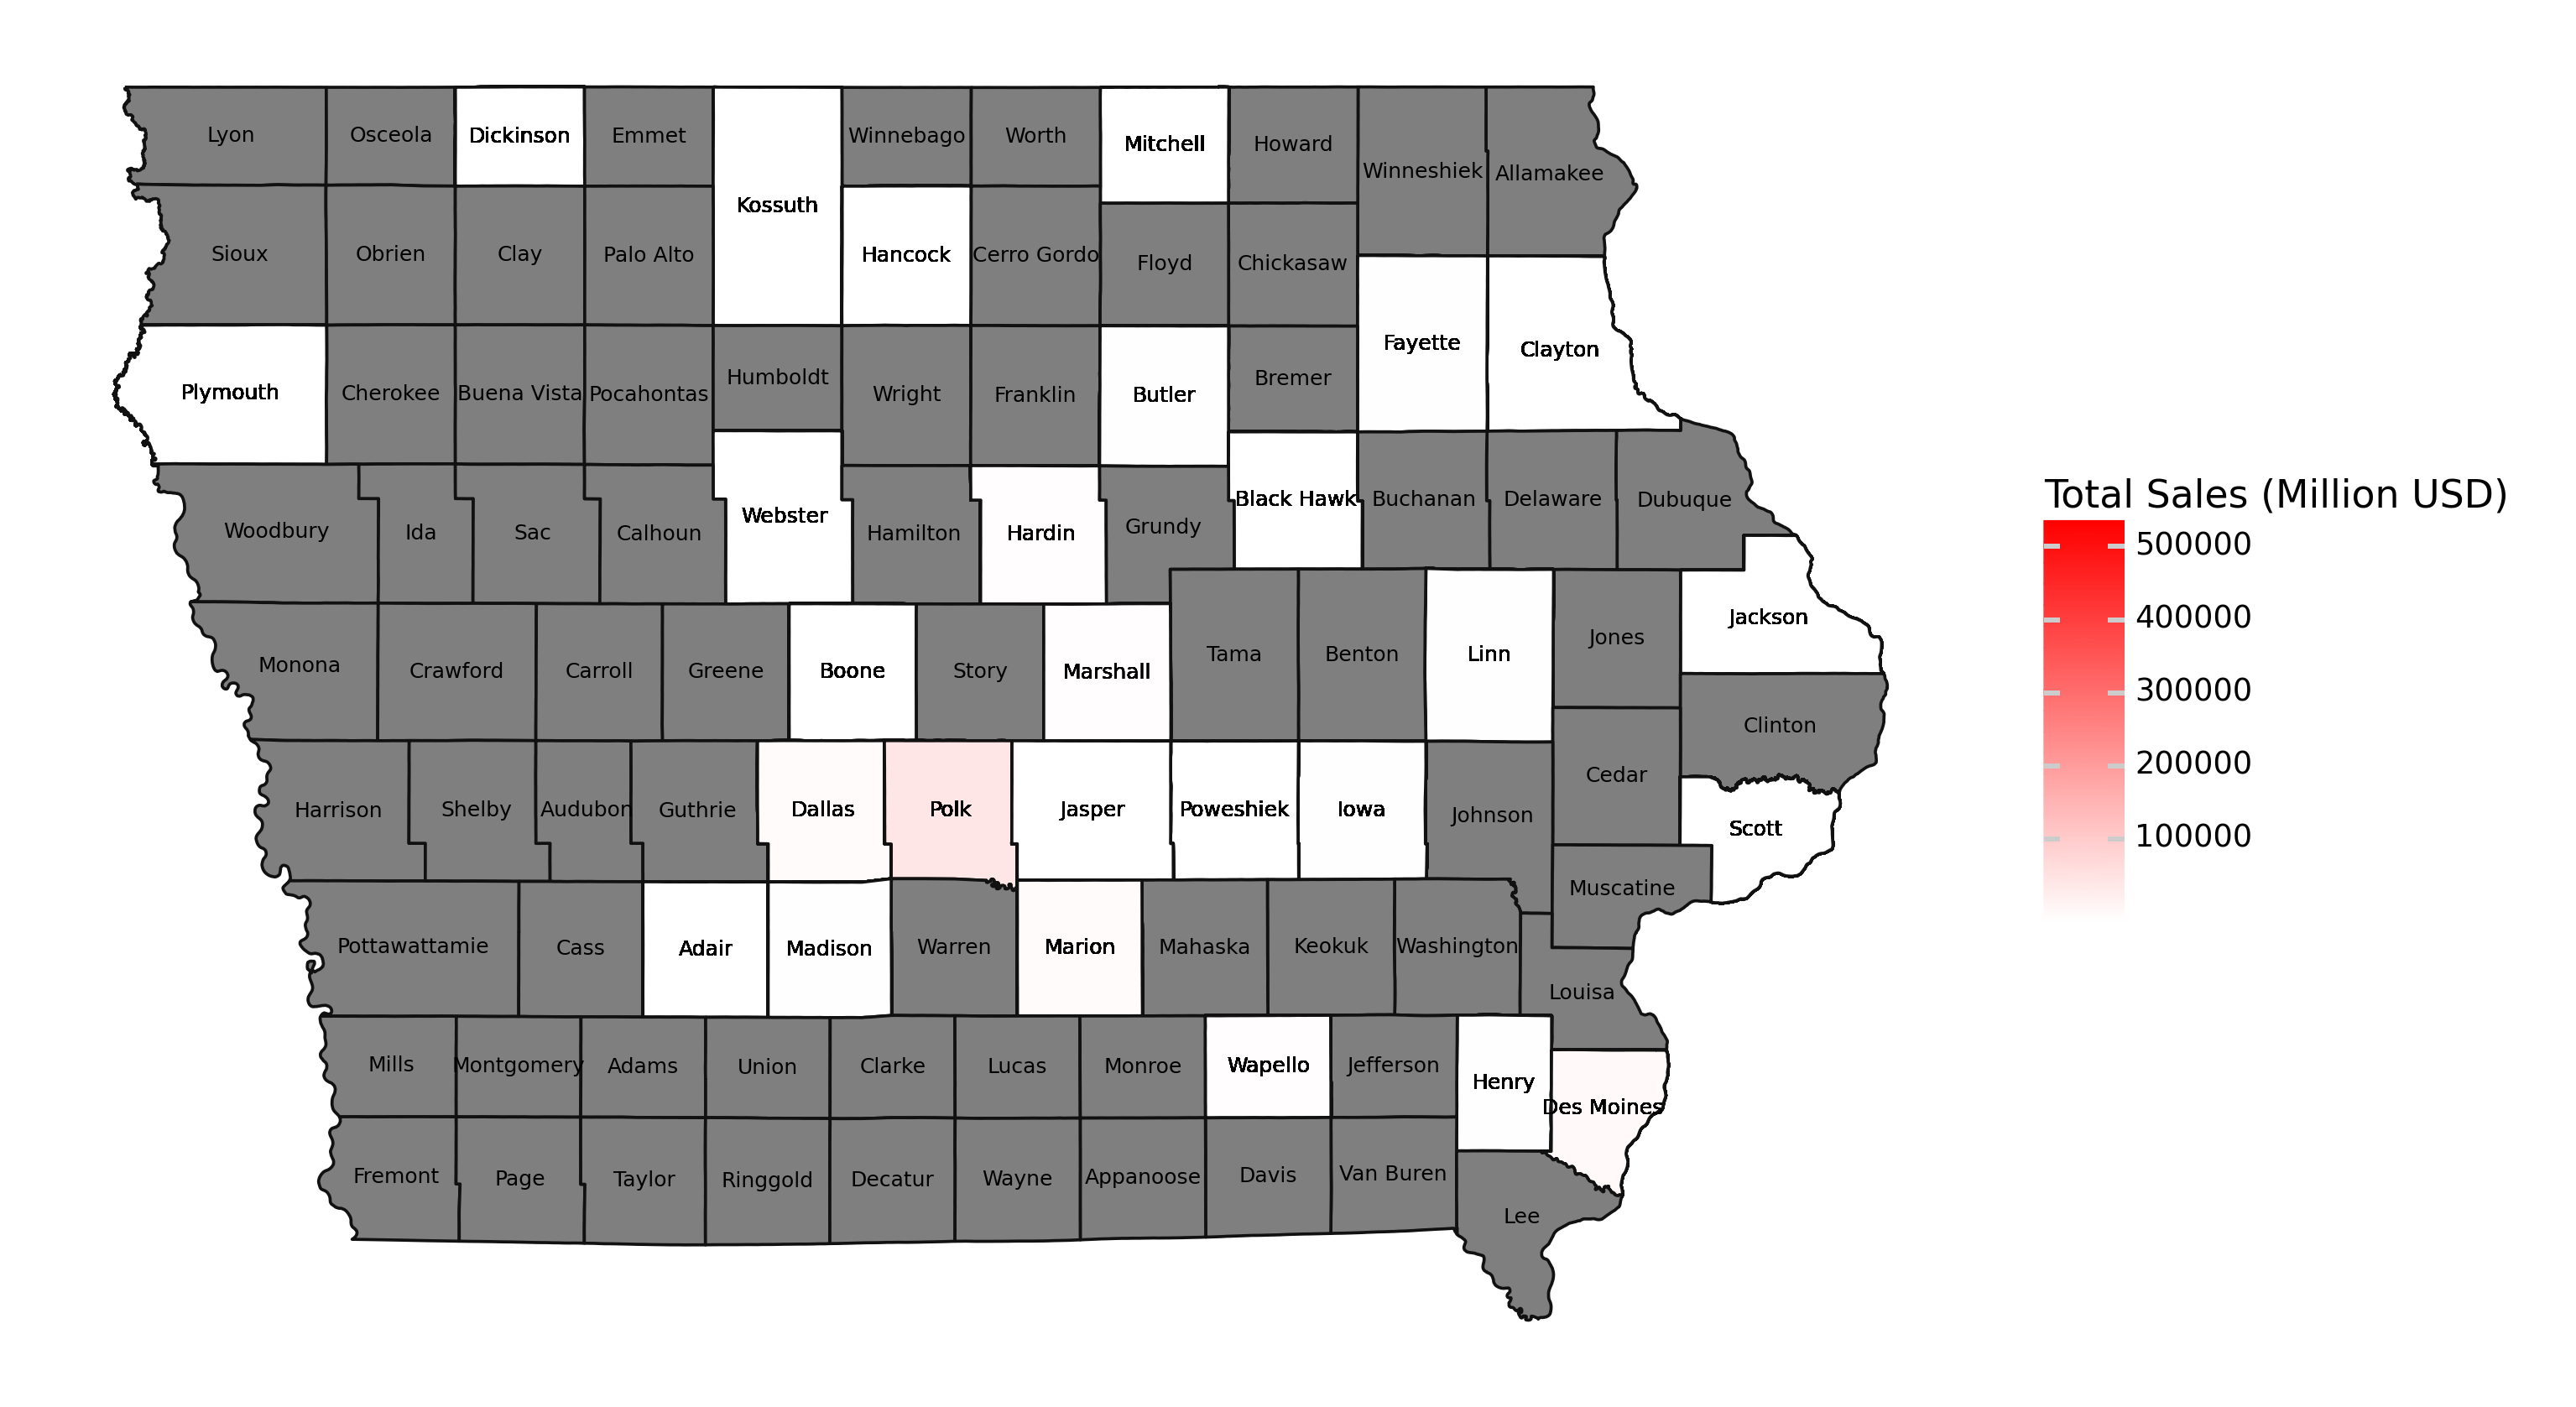

<ggplot: (8765053568479)>

In [23]:
# Taking the brands and then maping it county wise, to show hotspot of the sales
geo_df = geopandas.read_file("/Users/clarkuniveristy/Downloads/Iowa_County_Boundaries-shp/IowaCounties.shp")
geo_df["County"]=geo_df["CountyName"]

plot_data =pd.DataFrame((IowaLSdf1.groupby(['Category Name',"County"])['Sale (Dollars)'].sum()).reset_index())
plot_data = geo_df.merge(right=plot_data, how="left", on="County")
plot_data["centroid_x"] = plot_data.centroid.x
plot_data["centroid_y"] = plot_data.centroid.y



plotnine.options.dpi = 300
plotnine.options.figure_size=(10,7)
(ggplot(plot_data)
 + geom_map(aes(fill='Sale (Dollars)'), show_legend=True)
 + geom_text(aes(x="centroid_x", y="centroid_y", label="County"), size=6)
 + scale_fill_gradient(low="white", high="red", name="Total Sales (Million USD)")
 + theme(legend_position="right", panel_background=element_rect(fill="white"))
 + theme(axis_text=element_blank(), axis_ticks=element_blank(), axis_title=element_blank())
)

Explanation:

The pie chart shows the top 5 brands and the precentage of sales associated with the brand.

The above table provides you the amount of revenue for each brand.

The map visualize the total sales in each county based on catergory slaes. Grey indicates the the brands were not significat in sales. If the county has significant sales a transition of colors of white then red. 

How can this be applied?

Retailers:
Canadian Whiskies, Whiskey Liquor, Spiced Rum, Straight Bourbon, and American vodkas are safe brands to stock up on due to their generated sales.

Alcohol distributors :
Canadian Whiskies, Whiskey Liquor, Spiced Rum, Straight Bourbon, and American vodkas are safe brands to pitch to Iowa's ABD if with miniumum retailers backing. Creating a pricing stragetgy around those brands when pitching will increase the company's chance on being chosen. 


Retailers & Alcohol distributors :

Knowing the counties that produces the highest amount of sales will assit in all decision making strategies. For example, Polk is the county with the highest sales. Therefore, Retailers & Alcohol distributors should investigate why and how can this be reproduced in other counties.




### 3.2.3 What is the amount of sales procured by the top 5 alcohol vendors  that are frequenty used in Iowa?


In [24]:
# Finding out the top 5 Vendors Based on Frequency 
IowaLSdf1['Vendor Name'].value_counts()


DIAGEO AMERICAS         384365
Jim Beam Brands         213755
SAZERAC COMPANY  INC    200064
LUXCO INC               187956
PERNOD RICARD USA       135837
Name: Vendor Name, dtype: int64

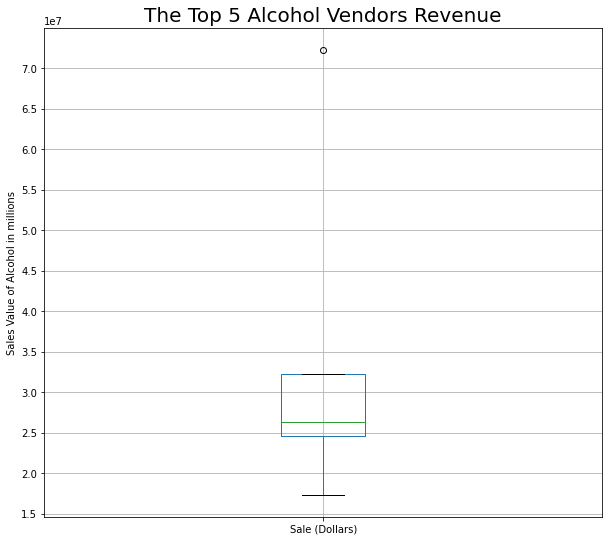

In [25]:
# Creating a boxplot for Revenue of the top 5 vendors 
dfc1 = IowaLSdf1[IowaLSdf1['Vendor Name'] == 'DIAGEO AMERICAS']
dfc2 = IowaLSdf1[IowaLSdf1['Vendor Name'] == 'Jim Beam Brands']
dfc3 = IowaLSdf1[IowaLSdf1['Vendor Name'] == 'SAZERAC COMPANY  INC']
dfc4 = IowaLSdf1[IowaLSdf1['Vendor Name'] == 'LUXCO INC']
dfc5 = IowaLSdf1[IowaLSdf1['Vendor Name'] == 'PERNOD RICARD USA']
dic = {'Vendor Name':['DIAGEO AMERICAS','Jim Beam Brands','SAZERAC COMPANY  INC','LUXCO INC','PERNOD RICARD USA'], 'Sale (Dollars)' : [dfc1['Sale (Dollars)'].sum(), dfc2['Sale (Dollars)'].sum(), dfc3['Sale (Dollars)'].sum(),dfc4['Sale (Dollars)'].sum(), dfc5['Sale (Dollars)'].sum()]}
dfSales = pd.DataFrame(data=dic)
dfSales
plt.rcParams['figure.figsize']=[10,9]
dfSales.boxplot(column=['Sale (Dollars)'],grid=True)
plt.ylabel('Sales Value of Alcohol in millions')
plt.title('The Top 5 Alcohol Vendors Revenue',fontsize=20)
plt.yticks(range(15000000,75000000,5000000))

plt.show()


Explanation:

Based on the top 5 vendors, the whiskerplot provides the minimum sales is around 17000000, the maximum sales amount is a little over 70000000, which is considered as an outlier. It can also be concluded that the median for the sales amount is around 26000000. 


How can this be applied?

Alcohol distributors:

Pontential end of year target markers based on freqency.



### 3.2.4 Which 10 zipcodes, represnted in their resprctive counties, have the maximum drinking population?

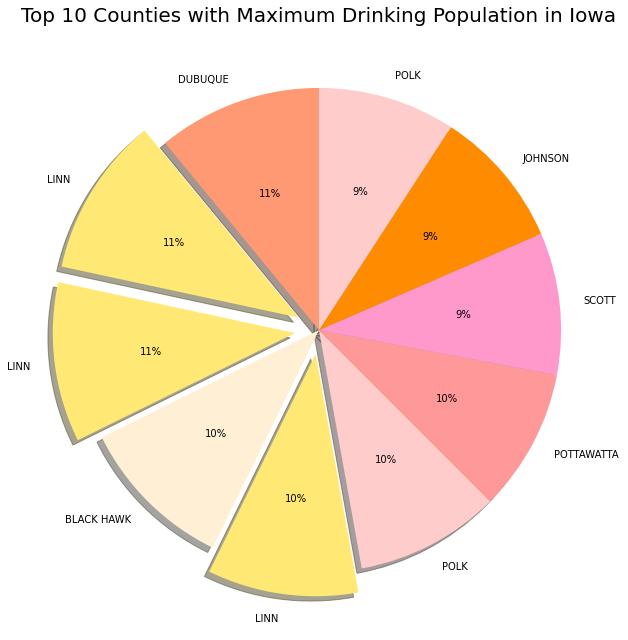

In [29]:
#creating a subset dataframe by grouping based pop and then focusing on drinks
#TotalPopdf['TPopulation'] = TotalPopdf['TPopulation'].str.replace(",","").astype(float)
Popdf=TotalPopdf.sort_values(by=['TPopulation'],ascending=False)
Popdf_10=Popdf.head(10)
dfc1 = IowaLSdf1.loc[IowaLSdf1['Zip Code'] == 52001, 'County'].iloc[0]
dfc2 = IowaLSdf1.loc[IowaLSdf1['Zip Code'] == 52302, 'County'].iloc[0]
dfc3 = IowaLSdf1.loc[IowaLSdf1['Zip Code'] == 52402, 'County'].iloc[0]
dfc4 = IowaLSdf1.loc[IowaLSdf1['Zip Code'] == 50613, 'County'].iloc[0]
dfc5 = IowaLSdf1.loc[IowaLSdf1['Zip Code'] == 52404, 'County'].iloc[0]
dfc6 = IowaLSdf1.loc[IowaLSdf1['Zip Code'] == 50317, 'County'].iloc[0]
dfc7 = IowaLSdf1.loc[IowaLSdf1['Zip Code'] == 51503, 'County'].iloc[0]
dfc8 = IowaLSdf1.loc[IowaLSdf1['Zip Code'] == 52722, 'County'].iloc[0]
dfc9 = IowaLSdf1.loc[IowaLSdf1['Zip Code'] == 52240, 'County'].iloc[0]
dfc10 = IowaLSdf1.loc[IowaLSdf1['Zip Code'] == 50315, 'County'].iloc[0]
explode=(0,0.1,0.1,0,0.1,0,0,0,0,0)
colors=('#ff9973','#FFE873','#FFE873','#FFEFD5','#FFE873','#FFCCCC','#FF9999','#FF99CC','#FF8C00', '#FFCCCC')
labels=[dfc1, dfc2, dfc3, dfc4, dfc5, dfc6, dfc7, dfc8, dfc9, dfc10]
plt.pie(Popdf_10['TPopulation'],labels=labels, explode=explode,autopct='%1.0f%%',shadow=True,startangle=90,colors=colors)
plt.title('Top 10 Counties with Maximum Drinking Population in Iowa',fontsize=20)
plt.tight_layout()
plt.show()

Explanation:

From the pie chart, it is depicted that the county with maximum population of legal drinking age reside in zipcodes that fall in the Linn county followed by the zipcodes residing in the Polk county.

How can this be applied?

Retailers:

With this information, Marketing Managers can get a better idea of where to advertise their products more in order to gain significant sales profit. 

### 3.2.5 What is the total sales of alcohol per month in 2019 in Iowa?



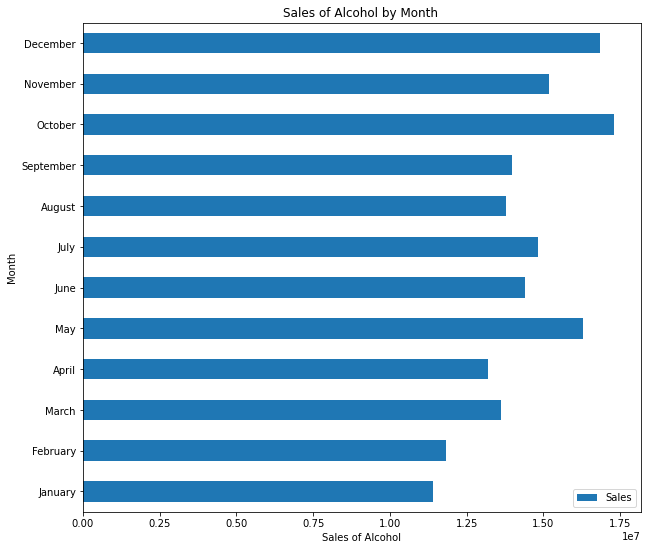

In [30]:
#creating an histogram for Sales of alcohol per month 
dic = {'Month':['January', 'February', 'March', 'April','May','June','July','August', 'September','October','November','December'], 'Sales':[IowaLSdf1.loc[(IowaLSdf1['Date'].dt.month==1)]['Sale (Dollars)'].sum(),IowaLSdf1.loc[(IowaLSdf1['Date'].dt.month==2)]['Sale (Dollars)'].sum(),IowaLSdf1.loc[(IowaLSdf1['Date'].dt.month==3)]['Sale (Dollars)'].sum(),IowaLSdf1.loc[(IowaLSdf1['Date'].dt.month==4)]['Sale (Dollars)'].sum(),IowaLSdf1.loc[(IowaLSdf1['Date'].dt.month==5)]['Sale (Dollars)'].sum(),IowaLSdf1.loc[(IowaLSdf1['Date'].dt.month==6)]['Sale (Dollars)'].sum(),IowaLSdf1.loc[(IowaLSdf1['Date'].dt.month==7)]['Sale (Dollars)'].sum(),IowaLSdf1.loc[(IowaLSdf1['Date'].dt.month==8)]['Sale (Dollars)'].sum(),IowaLSdf1.loc[(IowaLSdf1['Date'].dt.month==9)]['Sale (Dollars)'].sum(),IowaLSdf1.loc[(IowaLSdf1['Date'].dt.month==10)]['Sale (Dollars)'].sum(),IowaLSdf1.loc[(IowaLSdf1['Date'].dt.month==11)]['Sale (Dollars)'].sum(),IowaLSdf1.loc[(IowaLSdf1['Date'].dt.month==12)]['Sale (Dollars)'].sum()]}
dfMonth = pd.DataFrame(data=dic)
dfMonth
dfMonth.plot.barh(x='Month', y='Sales')
plt.title('Sales of Alcohol by Month ')
plt.xlabel('Sales of Alcohol')
plt.ylabel('Month')
plt.show()



Explanation:

Based on the histogram the top 5 months of sales are December, October, May, November and July. As expected, the higest month of sales are the ones that are consider the "holiday" months.


How can this be applied?

For retailers, being aware of the "hot" months can lead to effective marketing(i.e pricing) to generate more sales.

    

### 3.2.6 What is the male to female legal drinking population relation in the top 5 zipcodes?

<AxesSubplot:>

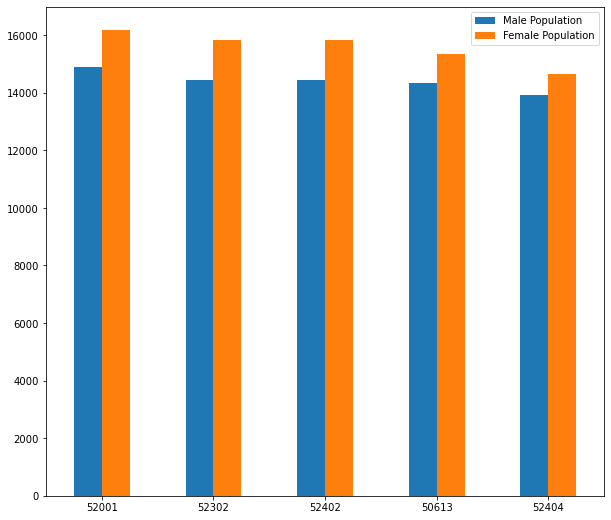

In [31]:
#creating an histogram an comparioson of male and female population based on the top zipcodes 

IowaLSdf1['MPopulation'] = IowaLSdf1['MPopulation'].str.replace(",","").astype(float)
IowaLSdf1['FPopulation'] = IowaLSdf1['FPopulation'].str.replace(",","").astype(float)
dfc1 = IowaLSdf1.loc[IowaLSdf1['Zip Code'] == 52001, 'MPopulation'].iloc[0]
dfc2 = IowaLSdf1.loc[IowaLSdf1['Zip Code'] == 52302, 'MPopulation'].iloc[0]
dfc3 = IowaLSdf1.loc[IowaLSdf1['Zip Code'] == 52402, 'MPopulation'].iloc[0]
dfc4 = IowaLSdf1.loc[IowaLSdf1['Zip Code'] == 50613, 'MPopulation'].iloc[0]
dfc5 = IowaLSdf1.loc[IowaLSdf1['Zip Code'] == 52404, 'MPopulation'].iloc[0]
dfc6 = IowaLSdf1.loc[IowaLSdf1['Zip Code'] == 52001, 'FPopulation'].iloc[0]
dfc7 = IowaLSdf1.loc[IowaLSdf1['Zip Code'] == 52302, 'FPopulation'].iloc[0]
dfc8 = IowaLSdf1.loc[IowaLSdf1['Zip Code'] == 52402, 'FPopulation'].iloc[0]
dfc9 = IowaLSdf1.loc[IowaLSdf1['Zip Code'] == 50613, 'FPopulation'].iloc[0]
dfc10 = IowaLSdf1.loc[IowaLSdf1['Zip Code'] == 52404, 'FPopulation'].iloc[0]
ZipCode = [52001, 52302, 52402, 50613, 52404]
MalePopulation = [dfc1, dfc2, dfc3, dfc4, dfc5]
FemalePopulation = [dfc6, dfc7, dfc8, dfc9, dfc10]
dfZip = pd.DataFrame({'Male Population':MalePopulation, 'Female Population':FemalePopulation}, index=ZipCode)
dfZip.plot.bar(rot=0)


Explanation:

The above multi bar graph gives a relation between the male and female population of legal drinking age in the top most populated zipcodes of Iowa. 

How this be applied?

Retailers:

On a more broader perspective, this information can be used by Advertising and Marketing Managers to better advertise their product in a way that is more appealing to the majority target audience.

### 3.2.7 What are the top stores frequenty purchasing liquor/generating sales in Iowa?

In [42]:
#finding the top 10 stores in terms of their frequency 
Storedf2=IowaLSdf1['Store Name'].value_counts(ascending=False).nlargest(10)
Storedf3=Storedf2.head(10)
Storedf3


Hy-Vee #3 / BDI / Des Moines            10753
Central City 2                           9212
Central City Liquor, Inc.                6605
Hy-Vee Food Store / Cedar Falls          6586
Hy-Vee Wine and Spirits / Iowa City      6391
Hy-Vee Wine and Spirits / Bettendorf     6071
Hy-Vee Food Store / Coralville           5849
Benz Distributing                        5339
Hy-Vee Food Store #1 / Mason City        5302
Cyclone Liquors                          5284
Name: Store Name, dtype: int64

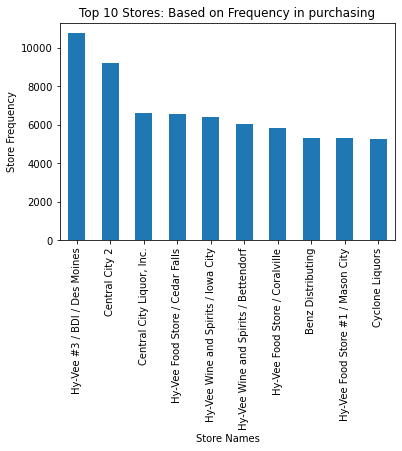

In [57]:
# bargraph on the top 10 stores and their frequency 
Storedf3.plot(kind="bar", title="Top 10 Stores by Purchase Frequency")
plt.title("Top 10 Stores: Based on Frequency in purchasing")
plt.xlabel("Store Names")
plt.ylabel("Store Frequency")
plt.show()

In [39]:
#finding the top 10 stores in terms of sales
Storedf22=pd.DataFrame(IowaLSdf1.groupby(['Store Name'])['Sale (Dollars)'].sum().nlargest(10))
Storedf33=Storedf22.head(10)
Storedf33


#pd.DataFrame(round (IowaLSdf1.groupby(['Category Name'])['Sale (Dollars)'].sum().nlargest(5)))

,Sale (Dollars)
Store Name,
Central City 2,6197967.43
Hy-Vee #3 / BDI / Des Moines,6122553.71
Hy-Vee Wine and Spirits / Iowa City,2392940.67
Wilkie Liquors,2097543.92
Sam's Club 8162 / Cedar Rapids,1786185.06
Lot-A-Spirits,1756811.97
Hy-Vee Food Store / Urbandale,1735531.47
Sam's Club 6344 / Windsor Heights,1611790.32
Benz Distributing,1535517.83


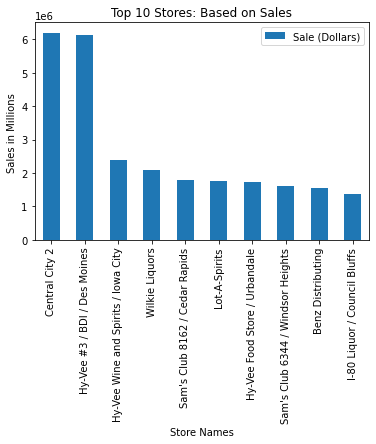

In [56]:
# bargraph on the top 10 stores and sales
Storedf33.plot(kind="bar", title="Top 10 Stores by Sales")
scale_factor = 1

xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()

plt.xlim(xmin * scale_factor, xmax * scale_factor)
plt.ylim(ymin * scale_factor, ymax * scale_factor)
plt.title("Top 10 Stores: Based on Sales")
plt.xlabel("Store Names")
plt.ylabel("Sales in Millions ")
plt.show()



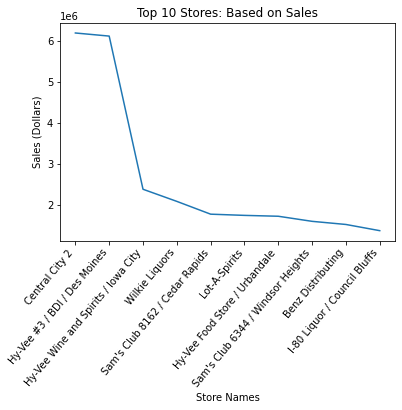

In [60]:
#creating a line graph on the Top 10 Stores: Based on Sales
plt.plot(Storedf33)
plt.title("Top 10 Stores: Based on Sales")
plt.xlabel("Store Names")
plt.ylabel("Sales in millions")
plt.xticks(rotation=50, horizontalalignment="right")

plt.show()





Explanation:

The Top 10 Stores by Purchase Frequency does not equate to Top 10 Stores: Based on Frequency in purchasing. Some stores (i.e Central City 2 and Hy-Vee Wine and Spirits / Iowa City)are within both categories indicating hot location and correct product selection.

How can this be applied?

Retailer:
Investigating the  strategies of stores that are within the both categories and how might it apply in other stores.

Vendors:
Being aware of both categories will narrow down what stores to focus on build or maintain a relationship with. Though the state picks the vendor to purchase, the state does listen to the customers (retailers). 

### 3.2.9 How many stores are present in the top 10 Counties?

In [38]:
#finding the top 10 counties
Countydf1= IowaLSdf1['County'].value_counts(ascending=False).to_frame()
Countydf2=Countydf1.head(10)
Countydf2

,County
POLK,182767
LINN,91130
SCOTT,61908
BLACK HAWK,57364
JOHNSON,56304
WOODBURY,38010
POTTAWATTA,37132
DUBUQUE,36273
STORY,34854
CERRO GORD,20225


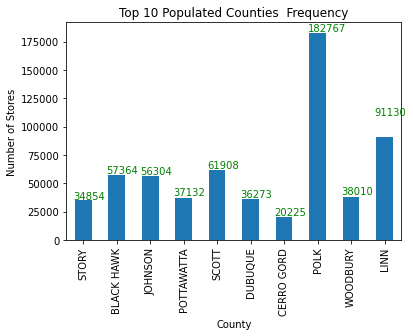

In [71]:
#Getting the count of purchasing frequency for each County
dfc1 = IowaLSdf1.loc[IowaLSdf1['County'] == 'POLK', 'Store Name'].count()
dfc2 = IowaLSdf1.loc[IowaLSdf1['County'] == 'LINN', 'Store Name'].count()
dfc3 = IowaLSdf1.loc[IowaLSdf1['County'] == 'SCOTT', 'Store Name'].count()
dfc4 = IowaLSdf1.loc[IowaLSdf1['County'] == 'BLACK HAWK', 'Store Name'].count()
dfc5 = IowaLSdf1.loc[IowaLSdf1['County'] == 'JOHNSON', 'Store Name'].count()
dfc6 = IowaLSdf1.loc[IowaLSdf1['County'] == 'WOODBURY', 'Store Name'].count()
dfc7 = IowaLSdf1.loc[IowaLSdf1['County'] == 'POTTAWATTA', 'Store Name'].count()
dfc8 = IowaLSdf1.loc[IowaLSdf1['County'] == 'DUBUQUE', 'Store Name'].count()
dfc9 = IowaLSdf1.loc[IowaLSdf1['County'] == 'STORY', 'Store Name'].count()
dfc10 = IowaLSdf1.loc[IowaLSdf1['County'] == 'CERRO GORD', 'Store Name'].count()

#Creating dataframe of county name and number of stores
dic = {'County':['STORY', 'BLACK HAWK', 'JOHNSON', 'POTTAWATTA','SCOTT','DUBUQUE','CERRO GORD','POLK', 'WOODBURY','LINN'], 'Number of Stores':[dfc9, dfc4, dfc5, dfc7, dfc3, dfc8, dfc10, dfc1, dfc6, dfc2]}
dfStore1 = pd.DataFrame(data=dic)

#Plotting bar graph and setting values for each bar
dfStore1.plot.bar(x='County', y='Number of Stores', legend = False)
plt.title('Top 10 Populated Counties  Frequency')
plt.xlabel('County')
plt.ylabel('Number of Stores')
plt.text(-0.3,36000,'34854', fontsize=10, color='green')
plt.text(0.7,59000,'57364', fontsize=10, color='green')
plt.text(1.7,58000,'56304', fontsize=10, color='green')
plt.text(2.7,39000,'37132', fontsize=10, color='green')
plt.text(3.7,63000,'61908', fontsize=10, color='green')
plt.text(4.7,38000,'36273', fontsize=10, color='green')
plt.text(5.7,22000,'20225', fontsize=10, color='green')
plt.text(6.7,184000,'182767', fontsize=10, color='green')
plt.text(7.7,40000,'38010', fontsize=10, color='green')
plt.text(8.7,110000,'91130', fontsize=10, color='green')
plt.show()

In [83]:
#finding the top 10 counties based on population 

County_Poupulation= IowaLSdf1.groupby(['County'])['TPopulation'].sum().nlargest(10)
County_Poupulation=County_Poupulation.head(10)
County_Poupulation

#ignore the sum- it does not represent the population

County
POLK          3209230592
LINN          1946360517
BLACK HAWK    1147453515
JOHNSON       1087414321
SCOTT         1050642441
POTTAWATTA     876571640
DUBUQUE        784018992
STORY          754266074
WOODBURY       413588423
CERRO GORD     360370012
Name: TPopulation, dtype: int64

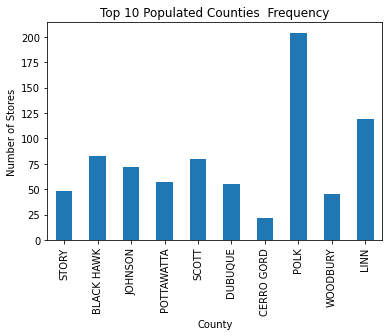

In [70]:
#Getting the number of stores in the 10 ten populated counties/ then the amount of stores 
dfc1 = IowaLSdf1.loc[IowaLSdf1['County'] == 'POLK', 'Store Name'].nunique()
dfc2 = IowaLSdf1.loc[IowaLSdf1['County'] == 'LINN', 'Store Name'].nunique()
dfc3 = IowaLSdf1.loc[IowaLSdf1['County'] == 'SCOTT', 'Store Name'].nunique()
dfc4 = IowaLSdf1.loc[IowaLSdf1['County'] == 'BLACK HAWK', 'Store Name'].nunique()
dfc5 = IowaLSdf1.loc[IowaLSdf1['County'] == 'JOHNSON', 'Store Name'].nunique()
dfc6 = IowaLSdf1.loc[IowaLSdf1['County'] == 'WOODBURY', 'Store Name'].nunique()
dfc7 = IowaLSdf1.loc[IowaLSdf1['County'] == 'POTTAWATTA', 'Store Name'].nunique()
dfc8 = IowaLSdf1.loc[IowaLSdf1['County'] == 'DUBUQUE', 'Store Name'].nunique()
dfc9 = IowaLSdf1.loc[IowaLSdf1['County'] == 'STORY', 'Store Name'].nunique()
dfc10 = IowaLSdf1.loc[IowaLSdf1['County'] == 'CERRO GORD', 'Store Name'].nunique()

#Creating dataframe of county name and number of stores
dic = {'County':['STORY', 'BLACK HAWK', 'JOHNSON', 'POTTAWATTA','SCOTT','DUBUQUE','CERRO GORD','POLK', 'WOODBURY','LINN'], 'Number of Stores':[dfc9, dfc4, dfc5, dfc7, dfc3, dfc8, dfc10, dfc1, dfc6, dfc2]}
dfStore1 = pd.DataFrame(data=dic)

#Plotting bar graph and setting values for each bar
dfStore1.plot.bar(x='County', y='Number of Stores', legend = False)
plt.title('Top 10 Populated Counties  Frequency')
plt.xlabel('County')
plt.ylabel('Number of Stores')
#plt.text(-0.3,36000,'34854', fontsize=10, color='green')
#plt.text(0.7,59000,'57364', fontsize=10, color='green')
#plt.text(1.7,58000,'56304', fontsize=10, color='green')
#plt.text(2.7,39000,'37132', fontsize=10, color='green')
#plt.text(3.7,63000,'61908', fontsize=10, color='green')
#plt.text(4.7,38000,'36273', fontsize=10, color='green')
#plt.text(5.7,22000,'20225', fontsize=10, color='green')
#plt.text(6.7,184000,'182767', fontsize=10, color='green')
#plt.text(7.7,40000,'38010', fontsize=10, color='green')
#plt.text(8.7,110000,'91130', fontsize=10, color='green')
plt.show()

Explanation: 
The first bar graph shows the top 10 counties based on frequency of purchases. 
The second bar graph that shows the number of stored of the  top 10 counties based on population.
The ranking of the both bar graph matches. Meaning the more stores the higer the frequency of purchase. 

How can this be applied?

Retailers:
Area of opportunies in terms of store expansion.

Vendors:

Counties to focus on to build relationships.


###  3.3 Diagnostic Data Analysis:

##### 3.3.1. 
##### H1: Seasonal purchase influences the popularity of alcohol. Specifically, the ranking of the top 5 brands is different during the winter and summer seasons.

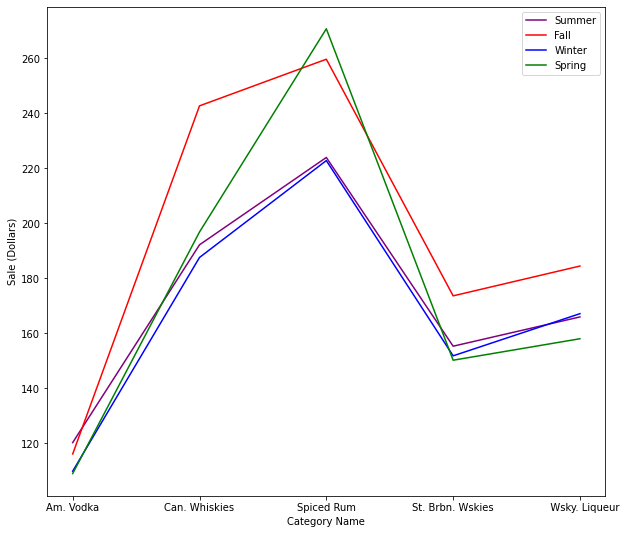

In [41]:
#Getting the top 5 kinds of alcohol in Summer
dfSummer = IowaLSdf1.loc[(IowaLSdf1['Date'].dt.month==6) | (IowaLSdf1['Date'].dt.month==7) | (IowaLSdf1['Date'].dt.month==8)]
dfc1 = dfSummer[dfSummer['Category Name'] == 'Canadian Whiskies']
dfc2 = dfSummer[dfSummer['Category Name'] == 'Whiskey Liqueur']
dfc3 = dfSummer[dfSummer['Category Name'] == 'Straight Bourbon Whiskies']
dfc4 = dfSummer[dfSummer['Category Name'] == 'Spiced Rum']
dfc5 = dfSummer[dfSummer['Category Name'] == 'American Vodkas']
frames = [dfc1, dfc2, dfc3, dfc4, dfc5]
dfSummer1 = pd.concat(frames)
dfSummer1.sort_index()
dfSummer2 = dfSummer1.groupby(['Category Name']).mean()

#Getting the top 5 kinds of alcohol in Fall
dfFall = IowaLSdf1.loc[(IowaLSdf1['Date'].dt.month==9) | (IowaLSdf1['Date'].dt.month==10) | (IowaLSdf1['Date'].dt.month==11)]
dfc1 = dfFall[dfFall['Category Name'] == 'Canadian Whiskies']
dfc2 = dfFall[dfFall['Category Name'] == 'Whiskey Liqueur']
dfc3 = dfFall[dfFall['Category Name'] == 'Straight Bourbon Whiskies']
dfc4 = dfFall[dfFall['Category Name'] == 'Spiced Rum']
dfc5 = dfFall[dfFall['Category Name'] == 'American Vodkas']
frames = [dfc1, dfc2, dfc3, dfc4, dfc5]
dfFall1 = pd.concat(frames)
dfFall1.sort_index()
dfFall2 = dfFall1.groupby(['Category Name']).mean()

#Getting the top 5 kinds of alcohol in Winter
dfWinter = IowaLSdf1.loc[(IowaLSdf1['Date'].dt.month==12) | (IowaLSdf1['Date'].dt.month==1) | (IowaLSdf1['Date'].dt.month==2)]
dfc1 = dfWinter[dfWinter['Category Name'] == 'Canadian Whiskies']
dfc2 = dfWinter[dfWinter['Category Name'] == 'Whiskey Liqueur']
dfc3 = dfWinter[dfWinter['Category Name'] == 'Straight Bourbon Whiskies']
dfc4 = dfWinter[dfWinter['Category Name'] == 'Spiced Rum']
dfc5 = dfWinter[dfWinter['Category Name'] == 'American Vodkas']
frames = [dfc1, dfc2, dfc3, dfc4, dfc5]
dfWinter1 = pd.concat(frames)
dfWinter1.sort_index()
dfWinter2 = dfWinter1.groupby(['Category Name']).mean()

#Getting the top 5 kinds of alcohol in Spring
dfSpring = IowaLSdf1.loc[(IowaLSdf1['Date'].dt.month==3) | (IowaLSdf1['Date'].dt.month==4) | (IowaLSdf1['Date'].dt.month==5)]
dfc1 = dfSpring[dfSpring['Category Name'] == 'Canadian Whiskies']
dfc2 = dfSpring[dfSpring['Category Name'] == 'Whiskey Liqueur']
dfc3 = dfSpring[dfSpring['Category Name'] == 'Straight Bourbon Whiskies']
dfc4 = dfSpring[dfSpring['Category Name'] == 'Spiced Rum']
dfc5 = dfSpring[dfSpring['Category Name'] == 'American Vodkas']
frames = [dfc1, dfc2, dfc3, dfc4, dfc5]
dfSpring1 = pd.concat(frames)
dfSpring1.sort_index()
dfSpring2 = dfSpring1.groupby(['Category Name']).mean()

#Plotting a line graph to compare the popularity of top 5 alcohol sales per season
plt.plot(dfSummer2['Sale (Dollars)'],color='purple',label = 'Summer')
plt.plot(dfFall2['Sale (Dollars)'],color='red', label = 'Fall')
plt.plot(dfWinter2['Sale (Dollars)'],color='blue', label = 'Winter')
plt.plot(dfSpring2['Sale (Dollars)'], color='green', label = 'Spring')
plt.xlabel('Category Name')
plt.ylabel('Sale (Dollars)')
plt.legend()
positions = (0, 1, 2, 3, 4)
labels = ("Am. Vodka", "Can. Whiskies", "Spiced Rum", "St. Brbn. Wskies", "   Wsky. Liqueur")
plt.xticks(positions, labels)
plt.plot(figsize=(100,20))
plt.show()

Explanation: 

We are rejecting  the null hypothesis, because according to the line graph, we interpret that the ranking of the top 5 liquor brands is different. For example, Wsky. Liqueur changes ranks during the Summer and Winter time. Also, the spring time seems the most fluctuating season w compared to the rest of the seasons that follow similar patterns.

Therefore, retail managers and marketing mangers on both side need to be prepared to curtate business flow based on season. 

##### 3.3.2.
##### H2: The top counties with the highest volume of alcohol consumed are equal to the top counties with the highest number of legal drinking populations.

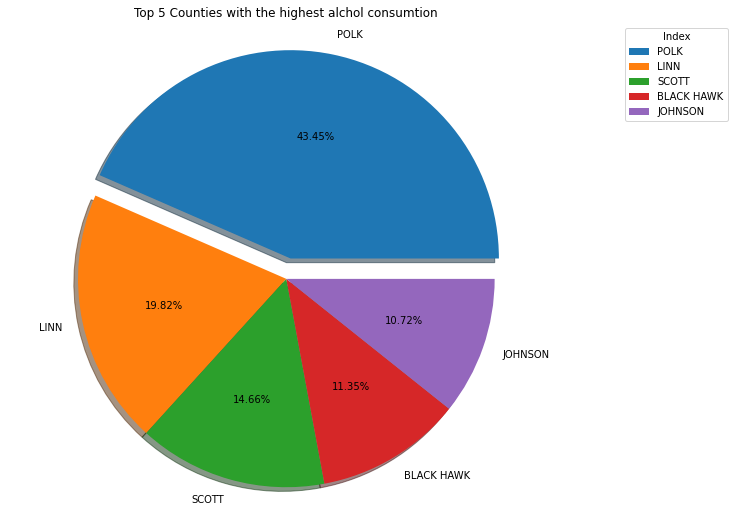

In [42]:
VolumeConsumed=IowaLSdf1.groupby(['County'])['Volume Sold (Liters)'].sum().nlargest(5)
labels= VolumeConsumed.index
sizes= VolumeConsumed
explode=(0.1, 0, 0, 0, 0)
plt.pie(sizes, labels=labels, explode=explode, autopct='%1.2f%%',shadow= True)
plt.axis('equal')
plt.legend(title="Index", loc='upper right', bbox_to_anchor=(1,0,0.3,1))
plt.title("Top 5 Counties with the highest alchol consumtion")
plt.show()

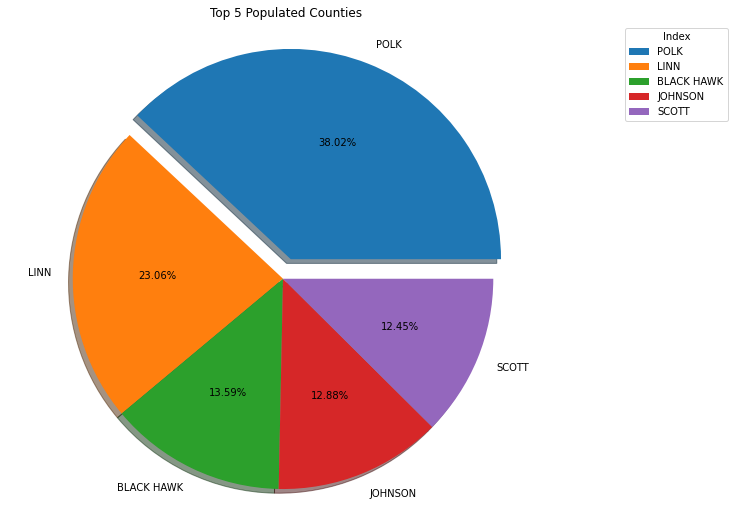

In [43]:
TotalPopulation=IowaLSdf1.groupby(['County'])['TPopulation'].sum().nlargest(5)
labels= TotalPopulation.index
sizes= TotalPopulation
explode=(0.1, 0, 0, 0, 0)
plt.pie(sizes, labels=labels, explode=explode, autopct='%1.2f%%',shadow= True)
plt.axis('equal')
plt.legend(title="Index", loc='upper right', bbox_to_anchor=(1,0,0.3,1))
plt.title("Top 5 Populated Counties")
plt.show()

Explanation:

We are accepting the null because the counties ranking does not stay the same for population and alochol consumtion. Scott County goes from the 3rd ranked county for alochol consumtion to 5th  place as a populated county.

This highlights location opportunities for both sides after futher invesitgation on the inclusing factor for the rack change.   

##### 3.3.3.
##### H3: The top 5 sales of alcohol will differ to areas that are more diverse per race compared to the highest Caucasian populate area.

In [44]:
#the the top 5 counties based on Asian race:
IowaLSdf1.groupby(['County'])['Asian alone'].sum().nlargest(5)

County
POLK       237556309.0
STORY      129655062.0
JOHNSON    100752121.0
LINN        90161700.0
SCOTT       51114745.0
Name: Asian alone, dtype: float64

In [45]:
#the the top 5 counties based on American Indian and Alaska Native race:
IowaLSdf1.groupby(['County'])['American Indian and Alaska Native alone'].sum().nlargest(5)

County
POLK          13225330.0
WOODBURY       9964963.0
LINN           8041683.0
BLACK HAWK     6273509.0
POTTAWATTA     6181103.0
Name: American Indian and Alaska Native alone, dtype: float64

In [46]:
#the the top 5 counties based on Black or African American race:
IowaLSdf1.groupby(['County'])['Black or African American alone'].sum().nlargest(5)

County
POLK          312963196.0
LINN          169116838.0
JOHNSON       141228562.0
BLACK HAWK    132794319.0
SCOTT         107105406.0
Name: Black or African American alone, dtype: float64

In [47]:
#the the top 5 counties based on Native Hawaiian and Other Pacific Islander race:
IowaLSdf1.groupby(['County'])['Native Hawaiian and Other Pacific Islander alone'].sum().nlargest(5)

County
DUBUQUE       7654955.0
LINN          5551252.0
POLK          4484366.0
BLACK HAWK    4092066.0
BUENA VIST    2187475.0
Name: Native Hawaiian and Other Pacific Islander alone, dtype: float64

In [48]:
#the the top 5 counties based on Some other race alone race:
IowaLSdf1.groupby(['County'])['Two or more races:'].sum().nlargest(5)

County
POLK          131446500.0
LINN           88786678.0
SCOTT          45501119.0
BLACK HAWK     35084578.0
JOHNSON        33513939.0
Name: Two or more races:, dtype: float64

In [49]:
#the the top 5 counties based on Some other race alone race:
IowaLSdf1.groupby(['County'])['Two or more races:'].sum().nlargest(5)


County
POLK          131446500.0
LINN           88786678.0
SCOTT          45501119.0
BLACK HAWK     35084578.0
JOHNSON        33513939.0
Name: Two or more races:, dtype: float64

In [50]:
IowaLSdf1["Category Name"].value_counts().nlargest(5)

American Vodkas              122561
Canadian Whiskies            115670
Whiskey Liqueur              113454
Straight Bourbon Whiskies     98998
Spiced Rum                    68887
Name: Category Name, dtype: int64

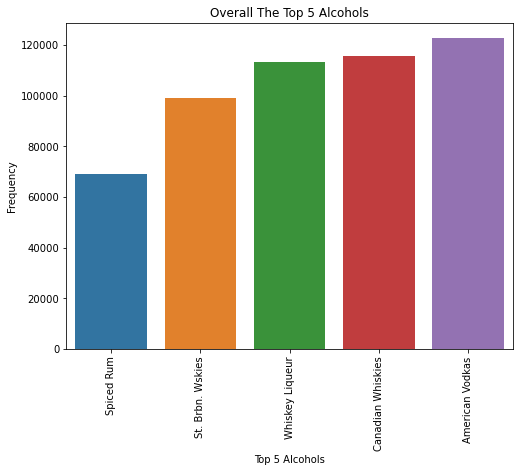

In [51]:
%matplotlib inline
fig=plt.figure(figsize=(8,6))
BarPlot0=sns.barplot(x=IowaLSdf1["Category Name"].value_counts().nlargest(5),y=IowaLSdf1["Category Name"],data=IowaLSdf1["Category Name"].value_counts(),dodge=False)
positions = (0,1,2,3,4)
labels = ("Spiced Rum","St. Brbn. Wskies","Whiskey Liqueur","Canadian Whiskies", "American Vodkas")
plt.xticks(positions, labels)
plt.setp(BarPlot0.get_xticklabels(), rotation=90)
plt.title("Overall The Top 5 Alcohols")
plt.xlabel("Top 5 Alcohols")
plt.ylabel("Frequency")
plt.show()

In [52]:
subset1 = IowaLSdf1[IowaLSdf1["County"]== "POLK"]

In [53]:
subset1["Category Name"].value_counts().nlargest(5)

American Vodkas              24085
Whiskey Liqueur              18951
Canadian Whiskies            17392
Straight Bourbon Whiskies    16916
Spiced Rum                   10780
Name: Category Name, dtype: int64

In [54]:
subset2 = IowaLSdf1[IowaLSdf1["County"]== "DUBUQUE"]

In [55]:
subset2["Category Name"].value_counts().nlargest(5)

American Vodkas              3433
Blended Whiskies             3363
Straight Bourbon Whiskies    3246
Whiskey Liqueur              3153
Canadian Whiskies            3036
Name: Category Name, dtype: int64

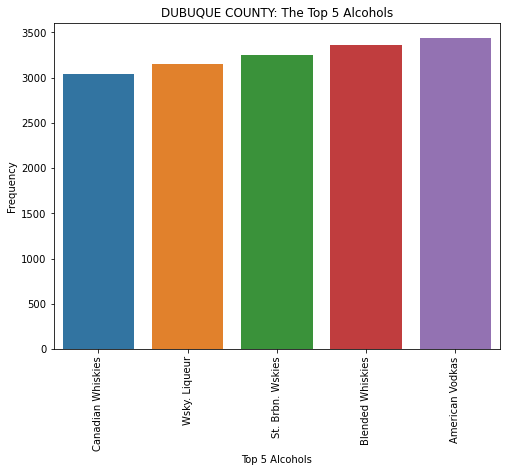

In [56]:


%matplotlib inline
fig=plt.figure(figsize=(8,6))
BarPlot=sns.barplot(x=subset2["Category Name"].value_counts().nlargest(5),y=subset2["Category Name"],data=subset2["Category Name"].value_counts(),dodge=False)
positions = (0,1,2,3,4)
labels = ("Canadian Whiskies","Wsky. Liqueur","St. Brbn. Wskies","Blended Whiskies","American Vodkas")
plt.xticks(positions, labels)
plt.setp(BarPlot.get_xticklabels(), rotation=90)
plt.title("DUBUQUE COUNTY: The Top 5 Alcohols")
plt.xlabel("Top 5 Alcohols")
plt.ylabel("Frequency")
plt.show()

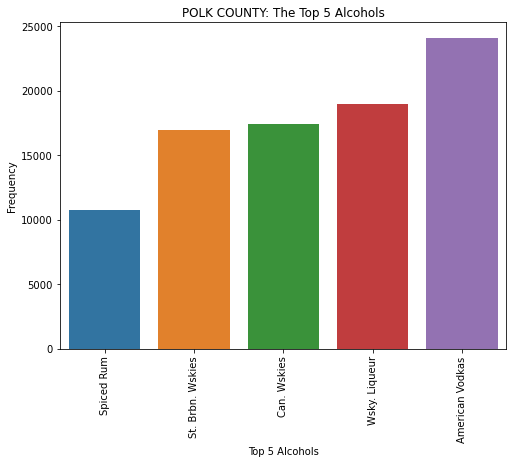

In [57]:
%matplotlib inline
fig=plt.figure(figsize=(8,6))
BarPlot1=sns.barplot(x=subset1["Category Name"].value_counts().nlargest(5),y=subset1["Category Name"],data=subset1["Category Name"].value_counts(),dodge=False)
positions = (0,1,2,3,4)
labels = ("Spiced Rum","St. Brbn. Wskies", "Can. Wskies", "Wsky. Liqueur", "American Vodkas")
plt.xticks(positions, labels)
plt.setp(BarPlot1.get_xticklabels(), rotation=90)
plt.title("POLK COUNTY: The Top 5 Alcohols")
plt.xlabel("Top 5 Alcohols")
plt.ylabel("Frequency")
plt.show()

Explanation:

The hypothesis is being rejected. As shown above, the overall and polk county top five brands are the same brand taste but within DUBUQUE county the ranking and brand changes. DUBUQUE County has the highest percentage of Native Hawaiian and Other Pacific Islander residents. POLK county has the highest percentage of divery for all other races. Due to the Caucasian population being over 90% within Iowa, the overall brand propularity is a jusify use.

Futher investigation for POLK county is needed for retailers perspective. Overall, the alcohol brand types that transcends diversity is something both parties can profit from. 

##### 3.3.4.
##### H4: Income does  have a significant impact on the sales of alcohol.

In [58]:
# Creating an OLS Regression

X = IowaLSdf1[['$10,000 to $14,999', '$100,000 to $149,999', '$15,000 to $24,999',
       '$150,000 to $199,999', '$200,000 or more', '$25,000 to $34,999',
       '$35,000 to $49,999', '$50,000 to $74,999', '$75,000 to $99,999',
       'Less than $10,000']]
Y = IowaLSdf1['Sale (Dollars)']

model= smf.ols(formula='Y ~X', data= IowaLSdf1)

resultsmodel=model.fit() 

print(resultsmodel.summary(xname=['Sale (Dollars)','$10,000 to $14,999', '$100,000 to $149,999', '$15,000 to $24,999',
       '$150,000 to $199,999', '$200,000 or more', '$25,000 to $34,999',
       '$35,000 to $49,999', '$50,000 to $74,999', '$75,000 to $99,999',
       'Less than $10,000']))

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     210.4
Date:                Mon, 29 Nov 2021   Prob (F-statistic):               0.00
Time:                        10:13:07   Log-Likelihood:            -8.5361e+06
No. Observations:             1121977   AIC:                         1.707e+07
Df Residuals:                 1121966   BIC:                         1.707e+07
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Sale (Dollars)        7998.5555 

Explanation:

According to the above regression analysis, we trying to understand the mathematical relationship between the Sales (dependent variable) and independent ranges (independent variable). 

Kowing the factor of this relation will determine and provide both sides to customized the brand and targeting methods.The next step after finding out if there is a signiface will be the location of the ranges and hence forth.

<b>R-squared</b>:The R-squared value depicts the extent to which any variation in the dependent
variable (a variable whose value depends on some other factors) is explained by the
independent variables (a variable whose value does not depend on any other factors). Here, the
dependent variable is Sales and the independent variables is the Income. The value of R-squared is 0.002 (0.2%) which is actually quite low for real-world data. It means that a full .2% of the variation of the Sales is completely explained by the Income. However, this also means that the model is free from specification error means, meaning one of the key variables of the model is incorrect. This concludes the model is not fit for real world application in determination of sales.

<b>F static</b> : We can observe that the Probability F statistic is 0, which indicates that the model is a good fit statistically . This means that the model is fit in order to reject the null and accept the alternative of income still playing in sales.

<b>P value</b> : The p-value for each term tests the null hypothesis that the coefficient is equal to zero concluding we can reject the null hypothesis. The alternative  hypothesis is accepted  and realized that the association between the Income and the Sales is statistically significant.

<b>Coefficients</b> : We can see that the Sales of the Liquor has positive correlation with the Income of the consumer as their coefficients are positive. This means that for every increase in Income, the sales of the Liquor increases as well. But due to the r-square, the coefficient should not be used for real world application.

<b>Prob(Omnibus)</b>: Omnibus test check if the errors are normally distributed assumption. If Prob(Omnibus) is closer it is to 1 the higher the regression model statisfy the assumption. In this case Prob(Omnibus) is 0.00, which implies that the OLS assumption is satisfied. 

<b>Durbin-watson</b>: Durbin-watson check if the model is of homoscedasticity which states that the variance of errors is constant.To prove this the value being between 1 to 2 is liked. Here, the value is 1.800 indicating that the model is reliable to use to interpret the hypothesis but also there is a positive correlation.

<b>Prob(Jarque-Bera)</b>: Similar to the Omnibus test, typically follow aligns. However, in this case the large value of 132814092139.901 explains that the error is not normally distributed. Therfore, the conflicting test highlights to use the regression model sparingly when interpreting.


Overall, we reject the null and accept the alternative null hypothesis. However, the regression model is not a good fit to apply in the real world for accurate interpretation of how much the income ranges affect the sales. 


##  4. Conclusion

###  4.1 Summary of Findings:



From our analysis, we can say that the minimum sales incurred by the top 5 vendors is around 17 million dollars with the highest being a little over 70 million dollars. Of the top 5 most sold brands, Canadian Whiskies has the highest percentage of sales followed by Spiced Rum. DIAGEO AMERICAS is the number 1 vendor of all categories of alcohol in Iowa. Of all the counties in Iowa, Linn county had the maximum population who are of legal drinking age. Most of the alcohol sales in the year of 2019 happened in the holiday season i.e., during the months of October and December.

From our hypotheses, we can interpret that seasonal purchases does predict the popularity of any type of alcohol. We can also say that the top counties with the highest percentage of alcohol consumed are not the same as the top counties with the highest legal drinking age population. It can interpretted that the top 5 alcohol sales does differ between counties of higher diversity when compared to a highly Caucasian populated area. Additionally, income is signifacnt for sales.

The descriptive and diagosnic analysis is a portion of the market reserach needed for retailers and acholo companies to advance their profits.


###  4.2 Business Implications:

Two business implicatios based on descriptive and diagnostice alnalyis: 

Price Gaging:
Usually, a company of any industry is prompted to understand the needs and reach of the audiences' ability to indulge in their product in terms of price. In this situation, price of a product does not really have much of an impact on the purchase of alcohol by the users due to Iowa being a control state. To ensure products are sold there is a heavier stance on relationship between vendor and retailer to encourage the state to select said alochol.   
 
Location Expansion:  
Black Hawk County is a pontential area of expansion due to the  large size of population, low alcohol consumption( compared to others top 4 counties based on population size) and low store transaction history. Demographically wise it is relatively diverse. Safe universal brands are American Vodka and Canadian Whiskey.

To conclude, due to the high expansion of alcohol just when covid was being discussed it can be said that a market research report is crucial to have a more profitable outcome in the coming years as technology will introduce to customers.

###  4.3 Limitations of the Project:

Some limitations:

1. Since the future can never be predicted correctly, this data may not be perfect for analysis of the future. A simple example would be covid. A sudden spike in the early months of 2020 would indicate a surge in purchases as compared to 2019 to depict a sudden change in the future that would affect analysis numerically. However this report can be use to drawn a market anasyis that is somewhat accurate to be used on the spot. To get an more accrate report the mergeing of 2018, 2019 and 2020 is reccomended. 2018 being a " normal" year, 2019 being a "transition " period and 2020 being the "new normal".

2. We had to use only one county for comparing alcohol sales with race due to the lack of diversity in other counties. Zipcode is suggested to be use to get a more targeted race implication. The suggestion is optional since the majority of the diversity is located in one county. The sugesstion is geared towards reatilers and small brand alcohol compananies. 

3. Although the top 5 vendors cover more than 60% of sales in Iowa, there is a possibility something significant could have been missed with regards to the rest of the vendors.

### 4.4. Projective Advancements:

To increase the efficiency of this project, the entire dataset should be used to produce a more in-depth and accurate analysis.

*This project can also be used as a part of a predictive and prescriptive analysis.

Predictive analysis attempts to answer the question “what is likely to happen”. This type of analytics utilizes previous data to make predictions about future outcomes. [11] 

Prescriptive analysis is the frontier of data analysis, combining the insight from all previous analyses to determine the course of action to take in a current problem or decision.[11]

Predictive and Prescriptive analysis can be used to answer questions like :

1. Which Vendor is more likely to be the most sought after alcohol company in the coming years?

2. What can be done to improve the sales of less well known alcohol brands?

3. Which store is more likely to have a significant increase in alcohol sales and should be more focused on?

*As stated above, it is recommmeded to use 2018, 2019, and 2020 for better analysis.  

##  5. References:

#Hello Professor Yoon, the datasets are located in vocamerum folder called DataSets.

What is data cleaning? Sisense. (2021, April 8). Retrieved November 28, 2021, from https://www.sisense.com/glossary/data-cleaning/.




What is Data Processing? definition and stages - talend cloud integration. Talend. (n.d.). Retrieved November 28, 2021, from https://www.talend.com/resources/what-is-data-processing/.




Rawat, A. S. (n.d.). What is descriptive analysis?- types and advantages: Analytics steps. What is Descriptive Analysis?- Types and Advantages | Analytics Steps. Retrieved November 28, 2021, from https://www.analyticssteps.com/blogs/overview-descriptive-analysis.




Types of data analysis. Chartio. (n.d.). Retrieved November 28, 2021, from https://chartio.com/learn/data-analytics/types-of-data-analysis/#:~:text=Diagnostic%20analysis%20takes%20the%20insights,and%20identifies%20patterns%20of%20behavior.




[5] Staff, K. C. R. G. (n.d.). Liquor sales increase in Iowa in fiscal year 2020. https://www.kcrg.com. Retrieved November 28, 2021, from https://www.kcrg.com/2020/12/11/liquor-sales-increase-in-iowa-in-fiscal-year-2020/.




[6] The effect of covid-19 on alcohol consumption, and policy responses to prevent harmful alcohol consumption. OECD. (2021, May 19). Retrieved November 28, 2021, from https://www.oecd.org/coronavirus/policy-responses/the-effect-of-covid-19-on-alcohol-consumption-and-policy-responses-to-prevent-harmful-alcohol-consumption-53890024/.



DATA LINK:
Bilogur, A. (2020, May 8). Iowa Liquor Sales. Kaggle. Retrieved November 28, 2021, from https://www.kaggle.com/residentmario/iowa-liquor-sales.




Iowa Department of Commerce, A. B. D. (2021, November 1). Iowa Liquor Sales. Retrieved November 28, 2021, from https://data.iowa.gov/Sales-Distribution/Iowa-Liquor-Sales/m3tr-qhgy.




Iowa Department of Commerce, A. B. D. (2021, November 1). 2020 Iowa liquor sales. Retrieved November 28, 2021, from https://data.iowa.gov/Sales-Distribution/2020-Iowa-Liquor-Sales/ktcd-5fm8.




Census Data:
Bureau, U. S. C. (2021, October 8). Iowa's 2020 population neared 3.2 million in 2020. Census.gov. Retrieved November 28, 2021, from https://www.census.gov/library/stories/state-by-state/iowa-population-change-between-census-decade.html.




Bureau, U. S. C. (2021, November 26). Census.gov. Retrieved November 28, 2021, from http://www.census.gov/.




Iowa post of Census Data
Decennial Census. Decennial Census - State Data Center. (n.d.). Retrieved November 28, 2021, from https://www.iowadatacenter.org/data/decennial.




state data center. (n.d.). Retrieved November 28, 2021, from https://www.iowadatacenter.org/data.




INCOME IN THE PAST 12 MONTHS (IN 2019 INFLATION-ADJUSTED DOLLARS)
Explore census data. (n.d.). Retrieved November 28, 2021, from https://data.census.gov/cedsci/table?t=Income+and+Poverty&g=0400000US19%248600000&tid=ACSST5Y2019.S1901.



[12] Iowa Alcoholic Beverages Division Annual Report FY2020. (n.d.). Retrieved November 28, 2021, from https://abd.iowa.gov/sites/default/files/media/file/2020-12/annual_report_fy20.pdf.



[13] Bureau, U. S. C. (2021, October 8). Iowa's 2020 population neared 3.2 million in 2020. Census.gov. Retrieved November 28, 2021, from https://www.census.gov/library/stories/state-by-state/iowa-population-change-between-census-decade.html.




RACE
Explore census data. (n.d.). Retrieved November 28, 2021, from https://data.census.gov/cedsci/table?t=American+Indian+and+Alaska+Native&g=0400000US19%248600000&tid=ACSDT5Y2019.B02001&hidePreview=true.




SEX
Census answer table.pdf - https\/data.census.gov\/cedsci\/table?q=Orange County CA hispanic&amp;tid=acsdt1y2019.b01001i&amp;hidepreview=false sex by age(hispanic: Course hero. Census answer table.pdf - https\/data.census.gov\/cedsci\/table?q=orange county ca hispanic&amp;tid=ACSDT1Y2019.B01001I&amp;hidePreview=false SEX BY AGE(HISPANIC | Course Hero. (n.d.). Retrieved November 28, 2021, from https://www.coursehero.com/file/111068043/Census-answer-tablepdf/.


DG;, U. (n.d.). Seasonal variation in alcohol use. Journal of studies on alcohol. Retrieved November 29, 2021, from https://pubmed.ncbi.nlm.nih.gov/8747501/.

Cerdá, M., Johnson-Lawrence, V. D., &amp; Galea, S. (2011, October). Lifetime income patterns and alcohol consumption: Investigating the association between long- and short-term income trajectories and drinking. Social science &amp; medicine (1982). Retrieved November 29, 2021, from https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3185179/.



code sales and store : https://towardsdatascience.com/combo-charts-with-seaborn-and-python-2bc911a08950
https://www.shanelynn.ie/bar-plots-in-python-using-pandas-dataframes/?amp
another code refrence :[8:13 PM] Thokala, Yashaswini
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html
pandas.DataFrame.plot.bar — pandas 1.3.4 documentation


[11] https://chartio.com/learn/data-analytics/types-of-data-analysis/#:~:text=Diagnostic%20analysis%20takes%20the%20insights,and%20identifies%20patterns%20of%20behavior




